<a href="https://colab.research.google.com/github/sdasmaha/Ml_Engineers_445/blob/master/C_ML4IOT_COLAB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This project is divided into Sections. Would suggest to open with the colab link for better viewing .

Colab Link = https://colab.research.google.com/drive/19rwqFr7jCUlW47K_o7452cgQOXEzc4Fm?usp=sharing




All the sensor data for 6 sensors are worked on but only with activity labels jumping, lying, standing.

The remaining 4 activity labels is a challenge that could not be met due to time constraints.

#Subject Details HAR DATASET

* Subject:12
*  Gender:Female
*  Age:16
*  Height:164 cm
*  Weight:54 kg
*  Occupation: Pupil




#Importing the Libraries

In [47]:
import pandas as pd
import numpy as np
import os
import matplotlib as plt
from matplotlib import pyplot

In [2]:
!pip install dtw

  Created wheel for dtw: filename=dtw-1.4.0-cp36-none-any.whl size=5315 sha256=d446f8a3868031da56b33f9789fe0ac5ebbbfdc48dc6c270c2fd9cdb22020500
  Stored in directory: /root/.cache/pip/wheels/8c/8b/7a/947d67b53cd54948890a173527b0470ef56998812fc9d0a803
Successfully built dtw


In [3]:
from dtw import dtw 

In [4]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


#NOTES

String Manipulation and Concatenation for loading files and working with variables done with MS.EXCEL. For future, we should using glob function.

I used data split function using the "=" operator to idenitify and reproduce multiple lines of code written below.


The code can be improved with using datastructures rather than for loops.
Also each run time was about 4-5 mins due to multi-dimensionality and poor use of data structures.


#Acceloremeter

In [5]:
df_acc_jump_chest = pd.read_csv("/content/gdrive/My Drive/ML4IOT/Notebook 1/Jumping/acc_jumping_csv/acc_jumping_chest.csv")
df_acc_jump_forearm = pd.read_csv("/content/gdrive/My Drive/ML4IOT/Notebook 1/Jumping/acc_jumping_csv/acc_jumping_forearm.csv")
df_acc_jump_head = pd.read_csv("/content/gdrive/My Drive/ML4IOT/Notebook 1/Jumping/acc_jumping_csv/acc_jumping_head.csv")
df_acc_jump_shin = pd.read_csv("/content/gdrive/My Drive/ML4IOT/Notebook 1/Jumping/acc_jumping_csv/acc_jumping_shin.csv")
df_acc_jump_thigh= pd.read_csv("/content/gdrive/My Drive/ML4IOT/Notebook 1/Jumping/acc_jumping_csv/acc_jumping_thigh.csv")
df_acc_jump_upperarm = pd.read_csv("/content/gdrive/My Drive/ML4IOT/Notebook 1/Jumping/acc_jumping_csv/acc_jumping_upperarm.csv")
df_acc_jump_waist = pd.read_csv("/content/gdrive/My Drive/ML4IOT/Notebook 1/Jumping/acc_jumping_csv/acc_jumping_waist.csv")

df_acc_lye_chest = pd.read_csv("/content/gdrive/My Drive/ML4IOT/Notebook 1/Lying/acc_lying_csv/acc_lying_chest.csv")
df_acc_lye_forearm = pd.read_csv("/content/gdrive/My Drive/ML4IOT/Notebook 1/Lying/acc_lying_csv/acc_lying_forearm.csv")
df_acc_lye_head = pd.read_csv("/content/gdrive/My Drive/ML4IOT/Notebook 1/Lying/acc_lying_csv/acc_lying_head.csv")
df_acc_lye_shin = pd.read_csv("/content/gdrive/My Drive/ML4IOT/Notebook 1/Lying/acc_lying_csv/acc_lying_shin.csv")
df_acc_lye_thigh = pd.read_csv("/content/gdrive/My Drive/ML4IOT/Notebook 1/Lying/acc_lying_csv/acc_lying_thigh.csv")
df_acc_lye_upperarm = pd.read_csv("/content/gdrive/My Drive/ML4IOT/Notebook 1/Lying/acc_lying_csv/acc_lying_upperarm.csv")
df_acc_lye_waist = pd.read_csv("/content/gdrive/My Drive/ML4IOT/Notebook 1/Lying/acc_lying_csv/acc_lying_waist.csv")

df_acc_stand_chest = pd.read_csv("/content/gdrive/My Drive/ML4IOT/Notebook 1/Standing/acc_standing_csv/acc_standing_chest.csv")
df_acc_stand_forearm = pd.read_csv("/content/gdrive/My Drive/ML4IOT/Notebook 1/Standing/acc_standing_csv/acc_standing_forearm.csv")
df_acc_stand_head = pd.read_csv("/content/gdrive/My Drive/ML4IOT/Notebook 1/Standing/acc_standing_csv/acc_standing_head.csv")
df_acc_stand_shin = pd.read_csv("/content/gdrive/My Drive/ML4IOT/Notebook 1/Standing/acc_standing_csv/acc_standing_shin.csv")
df_acc_stand_thigh = pd.read_csv("/content/gdrive/My Drive/ML4IOT/Notebook 1/Standing/acc_standing_csv/acc_standing_upperarm.csv")
df_acc_stand_upperarm = pd.read_csv("/content/gdrive/My Drive/ML4IOT/Notebook 1/Standing/acc_standing_csv/acc_standing_upperarm.csv")
df_acc_stand_waist = pd.read_csv("/content/gdrive/My Drive/ML4IOT/Notebook 1/Standing/acc_standing_csv/acc_standing_waist.csv")
 

In [6]:
df_acc_jump_chest = df_acc_jump_chest[['attr_x', 'attr_y', 'attr_z']].values[0:999,:]
df_acc_jump_forearm = df_acc_jump_forearm[['attr_x', 'attr_y', 'attr_z']].values[0:999,:]
df_acc_jump_head = df_acc_jump_head[['attr_x', 'attr_y', 'attr_z']].values[0:999,:]
df_acc_jump_shin = df_acc_jump_shin[['attr_x', 'attr_y', 'attr_z']].values[0:999,:]
df_acc_jump_thigh = df_acc_jump_thigh[['attr_x', 'attr_y', 'attr_z']].values[0:999,:]
df_acc_jump_upperarm = df_acc_jump_upperarm[['attr_x', 'attr_y', 'attr_z']].values[0:999,:]
df_acc_jump_waist = df_acc_jump_waist[['attr_x', 'attr_y', 'attr_z']].values[0:999,:]
df_acc_lye_chest = df_acc_lye_chest[['attr_x', 'attr_y', 'attr_z']].values[0:999,:]
df_acc_lye_forearm = df_acc_lye_forearm[['attr_x', 'attr_y', 'attr_z']].values[0:999,:]
df_acc_lye_head = df_acc_lye_head[['attr_x', 'attr_y', 'attr_z']].values[0:999,:]
df_acc_lye_shin = df_acc_lye_shin[['attr_x', 'attr_y', 'attr_z']].values[0:999,:]
df_acc_lye_thigh = df_acc_lye_thigh[['attr_x', 'attr_y', 'attr_z']].values[0:999,:]
df_acc_lye_upperarm = df_acc_lye_upperarm[['attr_x', 'attr_y', 'attr_z']].values[0:999,:]
df_acc_lye_waist = df_acc_lye_waist[['attr_x', 'attr_y', 'attr_z']].values[0:999,:]
df_acc_stand_chest = df_acc_stand_chest[['attr_x', 'attr_y', 'attr_z']].values[0:999,:]
df_acc_stand_forearm = df_acc_stand_forearm[['attr_x', 'attr_y', 'attr_z']].values[0:999,:]
df_acc_stand_head = df_acc_stand_head[['attr_x', 'attr_y', 'attr_z']].values[0:999,:]
df_acc_stand_shin = df_acc_stand_shin[['attr_x', 'attr_y', 'attr_z']].values[0:999,:]
df_acc_stand_thigh = df_acc_stand_thigh[['attr_x', 'attr_y', 'attr_z']].values[0:999,:]
df_acc_stand_upperarm = df_acc_stand_upperarm[['attr_x', 'attr_y', 'attr_z']].values[0:999,:]
df_acc_stand_waist = df_acc_stand_waist[['attr_x', 'attr_y', 'attr_z']].values[0:999,:]



In [7]:
acc_jump = [df_acc_jump_chest,df_acc_jump_forearm,df_acc_jump_head,df_acc_jump_shin,df_acc_jump_thigh,df_acc_jump_upperarm,df_acc_jump_waist]
acc_lye = [df_acc_lye_chest,df_acc_lye_forearm ,df_acc_lye_head,df_acc_lye_shin,df_acc_lye_thigh,df_acc_lye_upperarm,df_acc_lye_waist]
acc_stand = [df_acc_stand_chest,df_acc_stand_forearm ,df_acc_stand_head,df_acc_stand_shin,df_acc_stand_thigh,df_acc_stand_upperarm,df_acc_stand_waist]

Running 2 for loops 

In [ ]:
results = []
for i in acc_jump:
  for j in acc_jump:
    euclidean_distance =  lambda i,j: np.linalg.norm(i-j)
    d, cost_matrix, acc_cost_matrix, path = dtw(i, j, dist = euclidean_distance)
    results.append(d)

np.hstack(results)

array([    0.        , 14829.15491897, 12986.42782376,  7708.46421049,
        4076.84240386,  3977.11243373, 13250.36862331, 10983.17121063,
       14892.54574511, 14299.77810531, 10760.00334833, 11289.04306081,
       10722.38032688, 14520.56983296, 14829.15491897,     0.        ,
           0.        , 14829.15491897, 12986.42782376,  7708.46421049,
        4076.84240386,  3977.11243373, 13250.36862331, 14829.15491897,
           0.        ,  7118.26461695, 18231.69102728, 15130.71907549,
       15712.80605172, 15116.1820829 , 12986.42782376,  7118.26461695,
           0.        , 16242.84478079, 12389.5922458 , 13028.63271817,
       14231.19211889,  7708.46421049, 18231.69102728, 16242.84478079,
           0.        ,  9044.31104928,  8114.73716577, 13453.91952204,
        4076.84240386, 15130.71907549, 12389.5922458 ,  9044.31104928,
           0.        ,  4089.15431973, 14362.97202891,  3977.11243373,
       15712.80605172, 13028.63271817,  8114.73716577,  4089.15431973,
      

In [ ]:
results1 = []
for i in acc_lye:
  for j in acc_lye:
    euclidean_distance =  lambda i,j: np.linalg.norm(i-j)
    d, cost_matrix, acc_cost_matrix, path = dtw(i, j, dist = euclidean_distance)
    results1.append(d)

np.hstack(results1)


array([    0.        , 15470.15069445,  9635.83886849, 10975.85176031,
        3103.85770831,  7033.99649456,  9117.51836155, 15470.15069445,
           0.        , 13666.20012   , 18043.50200591, 14005.59348752,
       17610.54798477, 12355.45566421,  9635.83886849, 13666.20012   ,
           0.        , 11954.82799191,  8837.85382706,  7308.71788802,
       14980.02634949, 10975.85176031, 18043.50200591, 11954.82799191,
           0.        , 11635.57755591,  7099.3992894 , 16703.00187272,
        3103.85770831, 14005.59348752,  8837.85382706, 11635.57755591,
           0.        ,  7321.51868871,  8544.0977147 ,  7033.99649456,
       17610.54798477,  7308.71788802,  7099.3992894 ,  7321.51868871,
           0.        , 14692.71693826,  9117.51836155, 12355.45566421,
       14980.02634949, 16703.00187272,  8544.0977147 , 14692.71693826,
           0.        ])

In [ ]:
results3 = []
for i in acc_stand:
  for j in acc_stand:
    euclidean_distance =  lambda i,j: np.linalg.norm(i-j)
    d, cost_matrix, acc_cost_matrix, path = dtw(i, j, dist = euclidean_distance)
    results3.append(d)

np.hstack(results3)

array([    0.        , 16569.97633088, 13925.13694733,  3157.52408422,
        1975.92219426,  1975.92219426, 12691.39775829, 16569.97633088,
           0.        ,  4110.09703947, 15270.06995945, 15848.77288845,
       15848.77288845, 19558.651424  , 13925.13694733,  4110.09703947,
           0.        , 12534.19506047, 12809.44720526, 12809.44720526,
       19299.65087072,  3157.52408422, 15270.06995945, 12534.19506047,
           0.        ,  2449.11175123,  2449.11175123, 14920.08833654,
        1975.92219426, 15848.77288845, 12809.44720526,  2449.11175123,
           0.        ,     0.        , 14296.094205  ,  1975.92219426,
       15848.77288845, 12809.44720526,  2449.11175123,     0.        ,
           0.        , 14296.094205  , 12691.39775829, 19558.651424  ,
       19299.65087072, 14920.08833654, 14296.094205  , 14296.094205  ,
           0.        ])

**Acc Jump**

In [8]:
dtw_acc_jump = ([    0.        , 14829.15491897, 12986.42782376,  7708.46421049,
        4076.84240386,  3977.11243373, 13250.36862331, 10983.17121063,
       14892.54574511, 14299.77810531, 10760.00334833, 11289.04306081,
       10722.38032688, 14520.56983296, 14829.15491897,     0.        ,
           0.        , 14829.15491897, 12986.42782376,  7708.46421049,
        4076.84240386,  3977.11243373, 13250.36862331, 14829.15491897,
           0.        ,  7118.26461695, 18231.69102728, 15130.71907549,
       15712.80605172, 15116.1820829 , 12986.42782376,  7118.26461695,
           0.        , 16242.84478079, 12389.5922458 , 13028.63271817,
       14231.19211889,  7708.46421049, 18231.69102728, 16242.84478079,
           0.        ,  9044.31104928,  8114.73716577, 13453.91952204,
        4076.84240386, 15130.71907549, 12389.5922458 ,  9044.31104928,
           0.        ,  4089.15431973, 14362.97202891,  3977.11243373,
       15712.80605172, 13028.63271817,  8114.73716577,  4089.15431973,
           0.        , 13599.61402047, 13250.36862331, 15116.1820829 ,
       14231.19211889, 13453.91952204, 14362.97202891, 13599.61402047,
           0.        ])

**Acc Lye**

In [9]:
dtw_acc_lye = ([    0.        , 15470.15069445,  9635.83886849, 10975.85176031,
        3103.85770831,  7033.99649456,  9117.51836155, 15470.15069445,
           0.        , 13666.20012   , 18043.50200591, 14005.59348752,
       17610.54798477, 12355.45566421,  9635.83886849, 13666.20012   ,
           0.        , 11954.82799191,  8837.85382706,  7308.71788802,
       14980.02634949, 10975.85176031, 18043.50200591, 11954.82799191,
           0.        , 11635.57755591,  7099.3992894 , 16703.00187272,
        3103.85770831, 14005.59348752,  8837.85382706, 11635.57755591,
           0.        ,  7321.51868871,  8544.0977147 ,  7033.99649456,
       17610.54798477,  7308.71788802,  7099.3992894 ,  7321.51868871,
           0.        , 14692.71693826,  9117.51836155, 12355.45566421,
       14980.02634949, 16703.00187272,  8544.0977147 , 14692.71693826,
           0.        ])

**Acc Stand**

In [10]:
dtw_acc_stand = ([    0.        , 16569.97633088, 13925.13694733,  3157.52408422,
        1975.92219426,  1975.92219426, 12691.39775829, 16569.97633088,
           0.        ,  4110.09703947, 15270.06995945, 15848.77288845,
       15848.77288845, 19558.651424  , 13925.13694733,  4110.09703947,
           0.        , 12534.19506047, 12809.44720526, 12809.44720526,
       19299.65087072,  3157.52408422, 15270.06995945, 12534.19506047,
           0.        ,  2449.11175123,  2449.11175123, 14920.08833654,
        1975.92219426, 15848.77288845, 12809.44720526,  2449.11175123,
           0.        ,     0.        , 14296.094205  ,  1975.92219426,
       15848.77288845, 12809.44720526,  2449.11175123,     0.        ,
           0.        , 14296.094205  , 12691.39775829, 19558.651424  ,
       19299.65087072, 14920.08833654, 14296.094205  , 14296.094205  ,
           0.        ])

#GPS

In [11]:
df_gps_jump_chest = pd.read_csv("/content/gdrive/My Drive/ML4IOT/Notebook 1/Jumping/gps_jumping_csv/GPS_jumping_chest.csv")
df_gps_jump_head = pd.read_csv("/content/gdrive/My Drive/ML4IOT/Notebook 1/Jumping/gps_jumping_csv/GPS_jumping_head.csv")
df_gps_jump_shin = pd.read_csv("/content/gdrive/My Drive/ML4IOT/Notebook 1/Jumping/gps_jumping_csv/GPS_jumping_shin.csv")
df_gps_jump_thigh = pd.read_csv("/content/gdrive/My Drive/ML4IOT/Notebook 1/Jumping/gps_jumping_csv/GPS_jumping_thigh.csv")
df_gps_jump_upperarm = pd.read_csv("/content/gdrive/My Drive/ML4IOT/Notebook 1/Jumping/gps_jumping_csv/GPS_jumping_upperarm.csv")
df_gps_jump_waist = pd.read_csv("/content/gdrive/My Drive/ML4IOT/Notebook 1/Jumping/gps_jumping_csv/GPS_jumping_waist.csv")
df_gps_lye_chest = pd.read_csv("/content/gdrive/My Drive/ML4IOT/Notebook 1/Lying/gps_lying_csv/GPS_lying_chest.csv")
df_gps_lye_head = pd.read_csv("/content/gdrive/My Drive/ML4IOT/Notebook 1/Lying/gps_lying_csv/GPS_lying_head.csv")
df_gps_lye_shin = pd.read_csv("/content/gdrive/My Drive/ML4IOT/Notebook 1/Lying/gps_lying_csv/GPS_lying_shin.csv")
df_gps_lye_thigh = pd.read_csv("/content/gdrive/My Drive/ML4IOT/Notebook 1/Lying/gps_lying_csv/GPS_lying_thigh.csv")
df_gps_lye_upperarm = pd.read_csv("/content/gdrive/My Drive/ML4IOT/Notebook 1/Lying/gps_lying_csv/GPS_lying_upperarm.csv")
df_gps_lye_waist = pd.read_csv("/content/gdrive/My Drive/ML4IOT/Notebook 1/Lying/gps_lying_csv/GPS_lying_waist.csv")
df_gps_stand_chest = pd.read_csv("/content/gdrive/My Drive/ML4IOT/Notebook 1/Standing/gps_standing_csv/GPS_standing_chest.csv")
df_gps_stand_head = pd.read_csv("/content/gdrive/My Drive/ML4IOT/Notebook 1/Standing/gps_standing_csv/GPS_standing_head.csv")
df_gps_stand_shin = pd.read_csv("/content/gdrive/My Drive/ML4IOT/Notebook 1/Standing/gps_standing_csv/GPS_standing_shin.csv")
df_gps_stand_thigh = pd.read_csv("/content/gdrive/My Drive/ML4IOT/Notebook 1/Standing/gps_standing_csv/GPS_standing_thigh.csv")
df_gps_stand_upperarm = pd.read_csv("/content/gdrive/My Drive/ML4IOT/Notebook 1/Standing/gps_standing_csv/GPS_standing_upperarm.csv")
df_gps_stand_waist = pd.read_csv("/content/gdrive/My Drive/ML4IOT/Notebook 1/Standing/gps_standing_csv/GPS_standing_waist.csv")

In [12]:
df_gps_jump_chest = df_gps_jump_chest[['attr_lat', 'attr_lng']].values[0:999,:]
df_gps_jump_head = df_gps_jump_head[['attr_lat', 'attr_lng']].values[0:999,:]
df_gps_jump_shin = df_gps_jump_shin[['attr_lat', 'attr_lng']].values[0:999,:]
df_gps_jump_thigh = df_gps_jump_thigh[['attr_lat', 'attr_lng']].values[0:999,:]
df_gps_jump_upperarm = df_gps_jump_upperarm[['attr_lat', 'attr_lng']].values[0:999,:]
df_gps_jump_waist = df_gps_jump_waist[['attr_lat', 'attr_lng']].values[0:999,:]
df_gps_lye_chest = df_gps_lye_chest[['attr_lat', 'attr_lng']].values[0:999,:]
df_gps_lye_head = df_gps_lye_head[['attr_lat', 'attr_lng']].values[0:999,:]
df_gps_lye_shin = df_gps_lye_shin[['attr_lat', 'attr_lng']].values[0:999,:]
df_gps_lye_thigh = df_gps_lye_thigh[['attr_lat', 'attr_lng']].values[0:999,:]
df_gps_lye_upperarm = df_gps_lye_upperarm[['attr_lat', 'attr_lng']].values[0:999,:]
df_gps_lye_waist = df_gps_lye_waist[['attr_lat', 'attr_lng']].values[0:999,:]
df_gps_stand_chest = df_gps_stand_chest[['attr_lat', 'attr_lng']].values[0:999,:]
df_gps_stand_head = df_gps_stand_head[['attr_lat', 'attr_lng']].values[0:999,:]
df_gps_stand_shin = df_gps_stand_shin[['attr_lat', 'attr_lng']].values[0:999,:]
df_gps_stand_thigh = df_gps_stand_thigh[['attr_lat', 'attr_lng']].values[0:999,:]
df_gps_stand_upperarm = df_gps_stand_upperarm[['attr_lat', 'attr_lng']].values[0:999,:]
df_gps_stand_waist = df_gps_stand_waist[['attr_lat', 'attr_lng']].values[0:999,:]

In [ ]:
gps_jump = [df_gps_jump_chest,
df_gps_jump_head,
df_gps_jump_shin,
df_gps_jump_thigh,
df_gps_jump_upperarm,
df_gps_jump_waist]
gps_lye = [df_gps_lye_chest,
df_gps_lye_head,
df_gps_lye_shin,
df_gps_lye_thigh,
df_gps_lye_upperarm,
df_gps_lye_waist]
gps_stand = [df_gps_stand_chest,
df_gps_stand_head,
df_gps_stand_shin,
df_gps_stand_thigh,
df_gps_stand_upperarm,
df_gps_stand_waist]

*gps jump*

In [ ]:
results4 = []
for i in gps_jump:
  for j in gps_jump:
    euclidean_distance =  lambda i,j: np.linalg.norm(i-j)
    d, cost_matrix, acc_cost_matrix, path = dtw(i, j, dist = euclidean_distance)
    results4.append(d)

np.hstack(results4)

array([0.        , 0.00075855, 0.00242251, 0.00148687, 0.00128873,
       0.00225688, 0.00075855, 0.        , 0.00258669, 0.00123978,
       0.00178962, 0.00148676, 0.00242251, 0.00258669, 0.        ,
       0.00319761, 0.00137867, 0.00335171, 0.00148687, 0.00123978,
       0.00319761, 0.        , 0.00235259, 0.00079414, 0.00128873,
       0.00178962, 0.00137867, 0.00235259, 0.        , 0.00277712,
       0.00225688, 0.00148676, 0.00335171, 0.00079414, 0.00277712,
       0.        ])

**GPS Stand**

In [13]:
dtw_gps_jump = ([0.        , 0.00075855, 0.00242251, 0.00148687, 0.00128873,
       0.00225688, 0.00075855, 0.        , 0.00258669, 0.00123978,
       0.00178962, 0.00148676, 0.00242251, 0.00258669, 0.        ,
       0.00319761, 0.00137867, 0.00335171, 0.00148687, 0.00123978,
       0.00319761, 0.        , 0.00235259, 0.00079414, 0.00128873,
       0.00178962, 0.00137867, 0.00235259, 0.        , 0.00277712,
       0.00225688, 0.00148676, 0.00335171, 0.00079414, 0.00277712,
       0.        ])

In [ ]:
results5 = []
for i in gps_lye:
  for j in gps_lye:
    euclidean_distance =  lambda i,j: np.linalg.norm(i-j)
    d, cost_matrix, acc_cost_matrix, path = dtw(i, j, dist = euclidean_distance)
    results5.append(d)

np.hstack(results5)

array([0.00000000e+00, 9.39927465e-03, 2.36757244e-04, 9.45357958e-05,
       4.08372149e-04, 4.28114564e-04, 9.39927465e-03, 0.00000000e+00,
       9.21818637e-03, 9.37042825e-03, 9.02881663e-03, 9.00038468e-03,
       2.36757244e-04, 9.21818637e-03, 0.00000000e+00, 2.37634712e-04,
       1.91183383e-04, 3.56466489e-04, 9.45357958e-05, 9.37042825e-03,
       2.37634712e-04, 0.00000000e+00, 3.95494020e-04, 4.29875892e-04,
       4.08372149e-04, 9.02881663e-03, 1.91183383e-04, 3.95494020e-04,
       0.00000000e+00, 1.78271220e-04, 4.28114564e-04, 9.00038468e-03,
       3.56466489e-04, 4.29875892e-04, 1.78271220e-04, 0.00000000e+00])

**GPS Lye**

In [14]:
dtw_gps_lye = ([0.00000000e+00, 9.39927465e-03, 2.36757244e-04, 9.45357958e-05,
       4.08372149e-04, 4.28114564e-04, 9.39927465e-03, 0.00000000e+00,
       9.21818637e-03, 9.37042825e-03, 9.02881663e-03, 9.00038468e-03,
       2.36757244e-04, 9.21818637e-03, 0.00000000e+00, 2.37634712e-04,
       1.91183383e-04, 3.56466489e-04, 9.45357958e-05, 9.37042825e-03,
       2.37634712e-04, 0.00000000e+00, 3.95494020e-04, 4.29875892e-04,
       4.08372149e-04, 9.02881663e-03, 1.91183383e-04, 3.95494020e-04,
       0.00000000e+00, 1.78271220e-04, 4.28114564e-04, 9.00038468e-03,
       3.56466489e-04, 4.29875892e-04, 1.78271220e-04, 0.00000000e+00])

In [ ]:
results6 = []
for i in gps_stand:
  for j in gps_stand:
    euclidean_distance =  lambda i,j: np.linalg.norm(i-j)
    d, cost_matrix, acc_cost_matrix, path = dtw(i, j, dist = euclidean_distance)
    results6.append(d)

np.hstack(results6)

array([0.        , 0.00585401, 0.00555214, 0.00733219, 0.00737638,
       0.01268741, 0.00585401, 0.        , 0.00413158, 0.00862214,
       0.01055736, 0.00899989, 0.00555214, 0.00413158, 0.        ,
       0.003385  , 0.0056079 , 0.00727778, 0.00733219, 0.00862214,
       0.003385  , 0.        , 0.00497078, 0.01207812, 0.00737638,
       0.01055736, 0.0056079 , 0.00497078, 0.        , 0.01374157,
       0.01268741, 0.00899989, 0.00727778, 0.01207812, 0.01374157,
       0.        ])

**GPS Stand**

In [15]:
dtw_gps_stand = ([0.        , 0.00585401, 0.00555214, 0.00733219, 0.00737638,
       0.01268741, 0.00585401, 0.        , 0.00413158, 0.00862214,
       0.01055736, 0.00899989, 0.00555214, 0.00413158, 0.        ,
       0.003385  , 0.0056079 , 0.00727778, 0.00733219, 0.00862214,
       0.003385  , 0.        , 0.00497078, 0.01207812, 0.00737638,
       0.01055736, 0.0056079 , 0.00497078, 0.        , 0.01374157,
       0.01268741, 0.00899989, 0.00727778, 0.01207812, 0.01374157,
       0.        ])

#Gyroscope

In [ ]:
df_gyr_jump_chest = pd.read_csv("/content/gdrive/My Drive/ML4IOT/Notebook 1/Jumping/gyr_jumping_csv/Gyroscope_jumping_chest.csv")
df_gyr_jump_forearm = pd.read_csv("/content/gdrive/My Drive/ML4IOT/Notebook 1/Jumping/gyr_jumping_csv/Gyroscope_jumping_forearm.csv")
df_gyr_jump_head = pd.read_csv("/content/gdrive/My Drive/ML4IOT/Notebook 1/Jumping/gyr_jumping_csv/Gyroscope_jumping_head.csv")
df_gyr_jump_shin = pd.read_csv("/content/gdrive/My Drive/ML4IOT/Notebook 1/Jumping/gyr_jumping_csv/Gyroscope_jumping_shin.csv")
df_gyr_jump_thigh = pd.read_csv("/content/gdrive/My Drive/ML4IOT/Notebook 1/Jumping/gyr_jumping_csv/Gyroscope_jumping_thigh.csv")
df_gyr_jump_upperarm = pd.read_csv("/content/gdrive/My Drive/ML4IOT/Notebook 1/Jumping/gyr_jumping_csv/Gyroscope_jumping_upperarm.csv")
df_gyr_jump_waist = pd.read_csv("/content/gdrive/My Drive/ML4IOT/Notebook 1/Jumping/gyr_jumping_csv/Gyroscope_jumping_waist.csv")

df_gyr_lye_chest = pd.read_csv("/content/gdrive/My Drive/ML4IOT/Notebook 1/Lying/gyr_lying_csv/Gyroscope_lying_chest.csv")
df_gyr_lye_forearm = pd.read_csv("/content/gdrive/My Drive/ML4IOT/Notebook 1/Lying/gyr_lying_csv/Gyroscope_lying_forearm.csv")
df_gyr_lye_head = pd.read_csv("/content/gdrive/My Drive/ML4IOT/Notebook 1/Lying/gyr_lying_csv/Gyroscope_lying_head.csv")
df_gyr_lye_shin = pd.read_csv("/content/gdrive/My Drive/ML4IOT/Notebook 1/Lying/gyr_lying_csv/Gyroscope_lying_shin.csv")
df_gyr_lye_thigh = pd.read_csv("/content/gdrive/My Drive/ML4IOT/Notebook 1/Lying/gyr_lying_csv/Gyroscope_lying_thigh.csv")
df_gyr_lye_upperarm = pd.read_csv("/content/gdrive/My Drive/ML4IOT/Notebook 1/Lying/gyr_lying_csv/Gyroscope_lying_upperarm.csv")
df_gyr_lye_waist = pd.read_csv("/content/gdrive/My Drive/ML4IOT/Notebook 1/Lying/gyr_lying_csv/Gyroscope_lying_waist.csv")

df_gyr_stand_chest = pd.read_csv("/content/gdrive/My Drive/ML4IOT/Notebook 1/Standing/gyr_standing_csv/Gyroscope_standing_chest.csv")
df_gyr_stand_forearm = pd.read_csv("/content/gdrive/My Drive/ML4IOT/Notebook 1/Standing/gyr_standing_csv/Gyroscope_standing_forearm.csv")
df_gyr_stand_head = pd.read_csv("/content/gdrive/My Drive/ML4IOT/Notebook 1/Standing/gyr_standing_csv/Gyroscope_standing_head.csv")
df_gyr_stand_shin = pd.read_csv("/content/gdrive/My Drive/ML4IOT/Notebook 1/Standing/gyr_standing_csv/Gyroscope_standing_shin.csv")
df_gyr_stand_thigh = pd.read_csv("/content/gdrive/My Drive/ML4IOT/Notebook 1/Standing/gyr_standing_csv/Gyroscope_standing_thigh.csv")
df_gyr_stand_upperarm = pd.read_csv("/content/gdrive/My Drive/ML4IOT/Notebook 1/Standing/gyr_standing_csv/Gyroscope_standing_upperarm.csv")
df_gyr_stand_waist = pd.read_csv("/content/gdrive/My Drive/ML4IOT/Notebook 1/Standing/gyr_standing_csv/Gyroscope_standing_waist.csv")


In [ ]:
df_gyr_jump_chest = df_gyr_jump_chest[['attr_x', 'attr_y', 'attr_z']].values[0:999,:]
df_gyr_jump_forearm = df_gyr_jump_forearm[['attr_x', 'attr_y', 'attr_z']].values[0:999,:]
df_gyr_jump_head = df_gyr_jump_head[['attr_x', 'attr_y', 'attr_z']].values[0:999,:]
df_gyr_jump_shin = df_gyr_jump_shin[['attr_x', 'attr_y', 'attr_z']].values[0:999,:]
df_gyr_jump_thigh = df_gyr_jump_thigh[['attr_x', 'attr_y', 'attr_z']].values[0:999,:]
df_gyr_jump_upperarm = df_gyr_jump_upperarm[['attr_x', 'attr_y', 'attr_z']].values[0:999,:]
df_gyr_jump_waist = df_gyr_jump_waist[['attr_x', 'attr_y', 'attr_z']].values[0:999,:]
df_gyr_lye_chest = df_gyr_lye_chest[['attr_x', 'attr_y', 'attr_z']].values[0:999,:]
df_gyr_lye_forearm = df_gyr_lye_forearm[['attr_x', 'attr_y', 'attr_z']].values[0:999,:]
df_gyr_lye_head = df_gyr_lye_head[['attr_x', 'attr_y', 'attr_z']].values[0:999,:]
df_gyr_lye_shin = df_gyr_lye_shin[['attr_x', 'attr_y', 'attr_z']].values[0:999,:]
df_gyr_lye_thigh = df_gyr_lye_thigh[['attr_x', 'attr_y', 'attr_z']].values[0:999,:]
df_gyr_lye_upperarm = df_gyr_lye_upperarm[['attr_x', 'attr_y', 'attr_z']].values[0:999,:]
df_gyr_lye_waist = df_gyr_lye_waist[['attr_x', 'attr_y', 'attr_z']].values[0:999,:]
df_gyr_stand_chest = df_gyr_stand_chest[['attr_x', 'attr_y', 'attr_z']].values[0:999,:]
df_gyr_stand_forearm = df_gyr_stand_forearm[['attr_x', 'attr_y', 'attr_z']].values[0:999,:]
df_gyr_stand_head = df_gyr_stand_head[['attr_x', 'attr_y', 'attr_z']].values[0:999,:]
df_gyr_stand_shin = df_gyr_stand_shin[['attr_x', 'attr_y', 'attr_z']].values[0:999,:]
df_gyr_stand_thigh = df_gyr_stand_thigh[['attr_x', 'attr_y', 'attr_z']].values[0:999,:]
df_gyr_stand_upperarm = df_gyr_stand_upperarm[['attr_x', 'attr_y', 'attr_z']].values[0:999,:]
df_gyr_stand_waist = df_gyr_stand_waist[['attr_x', 'attr_y', 'attr_z']].values[0:999,:]

In [ ]:
gyr_jump = [df_gyr_jump_chest,df_gyr_jump_forearm,df_gyr_jump_head,df_gyr_jump_shin,df_gyr_jump_thigh,df_gyr_jump_upperarm,df_gyr_jump_waist]
gyr_lye = [df_gyr_lye_chest,df_gyr_lye_forearm ,df_gyr_lye_head,df_gyr_lye_shin,df_gyr_lye_thigh,df_gyr_lye_upperarm,df_gyr_lye_waist]
gyr_stand = [df_gyr_stand_chest,df_gyr_stand_forearm ,df_gyr_stand_head,df_gyr_stand_shin,df_gyr_stand_thigh,df_gyr_stand_upperarm,df_gyr_stand_waist]

In [ ]:
results7 = []
for i in gyr_jump:
  for j in gyr_jump:
    euclidean_distance =  lambda i,j: np.linalg.norm(i-j)
    d, cost_matrix, acc_cost_matrix, path = dtw(i, j, dist = euclidean_distance)
    results7.append(d)

np.hstack(results7)

array([   0.        , 1730.94590708,  626.16059494, 1720.90728085,
        884.35961272,  907.57570278,  682.56687902, 1730.94590708,
          0.        , 1615.70826844, 2071.82794897, 1743.45974339,
       1766.09264017, 1937.95095828,  626.16059494, 1615.70826844,
          0.        , 1670.81946119,  897.12631448, 1022.03243363,
        903.9123628 , 1720.90728085, 2071.82794897, 1670.81946119,
          0.        , 1830.19211841, 1804.07023014, 1892.64682715,
        884.35961272, 1743.45974339,  897.12631448, 1830.19211841,
          0.        , 1053.10966075, 1015.60679647,  907.57570278,
       1766.09264017, 1022.03243363, 1804.07023014, 1053.10966075,
          0.        ,  910.44316746,  682.56687902, 1937.95095828,
        903.9123628 , 1892.64682715, 1015.60679647,  910.44316746,
          0.        ])

**GYR Jump**

In [16]:
dtw_gyr_jump = ([   0.        , 1730.94590708,  626.16059494, 1720.90728085,
        884.35961272,  907.57570278,  682.56687902, 1730.94590708,
          0.        , 1615.70826844, 2071.82794897, 1743.45974339,
       1766.09264017, 1937.95095828,  626.16059494, 1615.70826844,
          0.        , 1670.81946119,  897.12631448, 1022.03243363,
        903.9123628 , 1720.90728085, 2071.82794897, 1670.81946119,
          0.        , 1830.19211841, 1804.07023014, 1892.64682715,
        884.35961272, 1743.45974339,  897.12631448, 1830.19211841,
          0.        , 1053.10966075, 1015.60679647,  907.57570278,
       1766.09264017, 1022.03243363, 1804.07023014, 1053.10966075,
          0.        ,  910.44316746,  682.56687902, 1937.95095828,
        903.9123628 , 1892.64682715, 1015.60679647,  910.44316746,
          0.        ])

In [ ]:
results8 = []
for i in gyr_lye:
  for j in gyr_lye:
    euclidean_distance =  lambda i,j: np.linalg.norm(i-j)
    d, cost_matrix, acc_cost_matrix, path = dtw(i, j, dist = euclidean_distance)
    results8.append(d)

np.hstack(results8)

array([  0.        , 422.17324002, 264.87654635, 427.21784863,
       364.41205685, 341.4109314 , 301.58069608, 422.17324002,
         0.        , 409.31020003, 519.02571506, 544.97292184,
       504.43923333, 447.29771747, 264.87654635, 409.31020003,
         0.        , 418.93262751, 335.64925291, 401.79329702,
       319.62760145, 427.21784863, 519.02571506, 418.93262751,
         0.        , 467.9579867 , 460.71845895, 387.00789463,
       364.41205685, 544.97292184, 335.64925291, 467.9579867 ,
         0.        , 507.20430024, 326.5558535 , 341.4109314 ,
       504.43923333, 401.79329702, 460.71845895, 507.20430024,
         0.        , 379.99989376, 301.58069608, 447.29771747,
       319.62760145, 387.00789463, 326.5558535 , 379.99989376,
         0.        ])

**GYR Lye**

In [17]:
dtw_gyr_lye = ([  0.        , 422.17324002, 264.87654635, 427.21784863,
       364.41205685, 341.4109314 , 301.58069608, 422.17324002,
         0.        , 409.31020003, 519.02571506, 544.97292184,
       504.43923333, 447.29771747, 264.87654635, 409.31020003,
         0.        , 418.93262751, 335.64925291, 401.79329702,
       319.62760145, 427.21784863, 519.02571506, 418.93262751,
         0.        , 467.9579867 , 460.71845895, 387.00789463,
       364.41205685, 544.97292184, 335.64925291, 467.9579867 ,
         0.        , 507.20430024, 326.5558535 , 341.4109314 ,
       504.43923333, 401.79329702, 460.71845895, 507.20430024,
         0.        , 379.99989376, 301.58069608, 447.29771747,
       319.62760145, 387.00789463, 326.5558535 , 379.99989376,
         0.        ])

In [ ]:
results9 = []
for i in gyr_stand:
  for j in gyr_stand:
    euclidean_distance =  lambda i,j: np.linalg.norm(i-j)
    d, cost_matrix, acc_cost_matrix, path = dtw(i, j, dist = euclidean_distance)
    results9.append(d)

np.hstack(results9)

array([  0.        , 300.80325   , 311.81396486, 165.77479402,
       167.5169034 , 244.37462314, 167.81043622, 300.80325   ,
         0.        , 388.83649876, 296.13357576, 306.67461592,
       381.86972005, 293.44593978, 311.81396486, 388.83649876,
         0.        , 314.5228698 , 329.02765689, 384.82830712,
       327.16641974, 165.77479402, 296.13357576, 314.5228698 ,
         0.        , 172.3372764 , 278.43344882, 175.28605098,
       167.5169034 , 306.67461592, 329.02765689, 172.3372764 ,
         0.        , 245.69798237, 166.7218662 , 244.37462314,
       381.86972005, 384.82830712, 278.43344882, 245.69798237,
         0.        , 266.2712614 , 167.81043622, 293.44593978,
       327.16641974, 175.28605098, 166.7218662 , 266.2712614 ,
         0.        ])

**GYR Stand**

In [18]:
dtw_gyr_stand = ([  0.        , 300.80325   , 311.81396486, 165.77479402,
       167.5169034 , 244.37462314, 167.81043622, 300.80325   ,
         0.        , 388.83649876, 296.13357576, 306.67461592,
       381.86972005, 293.44593978, 311.81396486, 388.83649876,
         0.        , 314.5228698 , 329.02765689, 384.82830712,
       327.16641974, 165.77479402, 296.13357576, 314.5228698 ,
         0.        , 172.3372764 , 278.43344882, 175.28605098,
       167.5169034 , 306.67461592, 329.02765689, 172.3372764 ,
         0.        , 245.69798237, 166.7218662 , 244.37462314,
       381.86972005, 384.82830712, 278.43344882, 245.69798237,
         0.        , 266.2712614 , 167.81043622, 293.44593978,
       327.16641974, 175.28605098, 166.7218662 , 266.2712614 ,
         0.        ])

#Light

In [ ]:
df_lig_jump_chest = pd.read_csv("/content/gdrive/My Drive/ML4IOT/Notebook 1/Jumping/lig_jumping_csv/Light_jumping_chest.csv")
df_lig_jump_head = pd.read_csv("/content/gdrive/My Drive/ML4IOT/Notebook 1/Jumping/lig_jumping_csv/Light_jumping_head.csv")
df_lig_jump_shin = pd.read_csv("/content/gdrive/My Drive/ML4IOT/Notebook 1/Jumping/lig_jumping_csv/Light_jumping_shin.csv")
df_lig_jump_thigh = pd.read_csv("/content/gdrive/My Drive/ML4IOT/Notebook 1/Jumping/lig_jumping_csv/Light_jumping_thigh.csv")
df_lig_jump_upperarm = pd.read_csv("/content/gdrive/My Drive/ML4IOT/Notebook 1/Jumping/lig_jumping_csv/Light_jumping_upperarm.csv")
df_lig_jump_waist = pd.read_csv("/content/gdrive/My Drive/ML4IOT/Notebook 1/Jumping/lig_jumping_csv/Light_jumping_waist.csv")

df_lig_lye_chest = pd.read_csv("/content/gdrive/My Drive/ML4IOT/Notebook 1/Lying/lig_lying_csv/Light_lying_chest.csv")
df_lig_lye_head = pd.read_csv("/content/gdrive/My Drive/ML4IOT/Notebook 1/Lying/lig_lying_csv/Light_lying_head.csv")
df_lig_lye_shin = pd.read_csv("/content/gdrive/My Drive/ML4IOT/Notebook 1/Lying/lig_lying_csv/Light_lying_shin.csv")
df_lig_lye_thigh = pd.read_csv("/content/gdrive/My Drive/ML4IOT/Notebook 1/Lying/lig_lying_csv/Light_lying_thigh.csv")
df_lig_lye_upperarm = pd.read_csv("/content/gdrive/My Drive/ML4IOT/Notebook 1/Lying/lig_lying_csv/Light_lying_upperarm.csv")
df_lig_lye_waist = pd.read_csv("/content/gdrive/My Drive/ML4IOT/Notebook 1/Lying/lig_lying_csv/Light_lying_waist.csv")

df_lig_stand_chest = pd.read_csv("/content/gdrive/My Drive/ML4IOT/Notebook 1/Standing/lig_standing_csv/Light_standing_chest.csv")
df_lig_stand_head = pd.read_csv("/content/gdrive/My Drive/ML4IOT/Notebook 1/Standing/lig_standing_csv/Light_standing_head.csv")
df_lig_stand_shin = pd.read_csv("/content/gdrive/My Drive/ML4IOT/Notebook 1/Standing/lig_standing_csv/Light_standing_shin.csv")
df_lig_stand_thigh = pd.read_csv("/content/gdrive/My Drive/ML4IOT/Notebook 1/Standing/lig_standing_csv/Light_standing_thigh.csv")
df_lig_stand_upperarm = pd.read_csv("/content/gdrive/My Drive/ML4IOT/Notebook 1/Standing/lig_standing_csv/Light_standing_upperarm.csv")
df_lig_stand_waist = pd.read_csv("/content/gdrive/My Drive/ML4IOT/Notebook 1/Standing/lig_standing_csv/Light_standing_waist.csv")

In [ ]:
df_lig_jump_chest.head()

,id,attr_time,attr_light
0,1,1436970288141,27.0
1,2,1436970288161,27.0
2,3,1436970288181,27.0
3,4,1436970288200,27.0
4,5,1436970288221,26.0


In [ ]:
df_lig_jump_chest = df_lig_jump_chest[['attr_light']].values[0:999]
df_lig_jump_head = df_lig_jump_head[['attr_light']].values[0:999]
df_lig_jump_shin = df_lig_jump_shin[['attr_light']].values[0:999]
df_lig_jump_thigh = df_lig_jump_thigh[['attr_light']].values[0:999]
df_lig_jump_upperarm = df_lig_jump_upperarm[['attr_light']].values[0:999]
df_lig_jump_waist = df_lig_jump_waist[['attr_light']].values[0:999]
df_lig_lye_chest = df_lig_lye_chest[['attr_light']].values[0:999]
df_lig_lye_head = df_lig_lye_head[['attr_light']].values[0:999]
df_lig_lye_shin = df_lig_lye_shin[['attr_light']].values[0:999]
df_lig_lye_thigh = df_lig_lye_thigh[['attr_light']].values[0:999]
df_lig_lye_upperarm = df_lig_lye_upperarm[['attr_light']].values[0:999]
df_lig_lye_waist = df_lig_lye_waist[['attr_light']].values[0:999]
df_lig_stand_chest = df_lig_stand_chest[['attr_light']].values[0:999]
df_lig_stand_head = df_lig_stand_head[['attr_light']].values[0:999]
df_lig_stand_shin = df_lig_stand_shin[['attr_light']].values[0:999]
df_lig_stand_thigh = df_lig_stand_thigh[['attr_light']].values[0:999]
df_lig_stand_upperarm = df_lig_stand_upperarm[['attr_light']].values[0:999]
df_lig_stand_waist = df_lig_stand_waist[['attr_light']].values[0:999]

In [ ]:
light_jump = [df_lig_jump_chest,
df_lig_jump_head,
df_lig_jump_shin,
df_lig_jump_thigh,
df_lig_jump_upperarm,
df_lig_jump_waist]

light_lye = [df_lig_lye_chest,
df_lig_lye_head,
df_lig_lye_shin,
df_lig_lye_thigh,
df_lig_lye_upperarm,
df_lig_lye_waist]

light_stand = [
df_lig_stand_chest,
df_lig_stand_head,
df_lig_stand_shin,
df_lig_stand_thigh,
df_lig_stand_upperarm,
df_lig_stand_waist]

In [ ]:
results10 = []
for i in light_jump:
  for j in light_jump:
    euclidean_distance =  lambda i,j: np.linalg.norm(i-j)
    d, cost_matrix, acc_cost_matrix, path = dtw(i, j, dist = euclidean_distance)
    results10.append(d)

np.hstack(results10)

array([     0., 257392., 321476., 359163., 291917., 112202., 257392.,
            0., 178720., 569585., 102622., 318416., 321476., 178720.,
            0., 489655.,  74537., 502194., 359163., 569585., 489655.,
            0., 523750., 407890., 291917., 102622.,  74537., 523750.,
            0., 432741., 112202., 318416., 502194., 407890., 432741.,
            0.])

**Light Stand**

In [19]:
dtw_lig_jump = ([     0., 257392., 321476., 359163., 291917., 112202., 257392.,
            0., 178720., 569585., 102622., 318416., 321476., 178720.,
            0., 489655.,  74537., 502194., 359163., 569585., 489655.,
            0., 523750., 407890., 291917., 102622.,  74537., 523750.,
            0., 432741., 112202., 318416., 502194., 407890., 432741.,
            0.])

In [ ]:
results11 = []
for i in light_lye:
  for j in light_lye:
    euclidean_distance =  lambda i,j: np.linalg.norm(i-j)
    d, cost_matrix, acc_cost_matrix, path = dtw(i, j, dist = euclidean_distance)
    results11.append(d)

np.hstack(results11)

array([    0., 38633., 32577., 36974., 23933., 40524., 38633.,     0.,
        5956.,  2915., 14700.,  1882., 32577.,  5956.,     0.,  4586.,
        8835.,  7542., 36974.,  2915.,  4586.,     0., 13041.,  3550.,
       23933., 14700.,  8835., 13041.,     0., 16591., 40524.,  1882.,
        7542.,  3550., 16591.,     0.])

**Light Lye**

In [20]:
dtw_lig_lye = ([    0., 38633., 32577., 36974., 23933., 40524., 38633.,     0.,
        5956.,  2915., 14700.,  1882., 32577.,  5956.,     0.,  4586.,
        8835.,  7542., 36974.,  2915.,  4586.,     0., 13041.,  3550.,
       23933., 14700.,  8835., 13041.,     0., 16591., 40524.,  1882.,
        7542.,  3550., 16591.,     0.])

In [ ]:
results11 = []
for i in light_stand:
  for j in light_stand:
    euclidean_distance =  lambda i,j: np.linalg.norm(i-j)
    d, cost_matrix, acc_cost_matrix, path = dtw(i, j, dist = euclidean_distance)
    results11.append(d)

np.hstack(results11)


array([      0.,  655563.,  554987., 1197273.,  629978.,  728424.,
        655563.,       0.,  100576., 1825957.,   21201.,   72861.,
        554987.,  100576.,       0., 1725381.,   74991.,  173437.,
       1197273., 1825957., 1725381.,       0., 1800372., 1898818.,
        629978.,   21201.,   74991., 1800372.,       0.,   98446.,
        728424.,   72861.,  173437., 1898818.,   98446.,       0.])

**Light Stand**

In [21]:
dtw_lig_stand = ([      0.,  655563.,  554987., 1197273.,  629978.,  728424.,
        655563.,       0.,  100576., 1825957.,   21201.,   72861.,
        554987.,  100576.,       0., 1725381.,   74991.,  173437.,
       1197273., 1825957., 1725381.,       0., 1800372., 1898818.,
        629978.,   21201.,   74991., 1800372.,       0.,   98446.,
        728424.,   72861.,  173437., 1898818.,   98446.,       0.])

#Magnetic


In [ ]:
df_mag_jump_chest = pd.read_csv("/content/gdrive/My Drive/ML4IOT/Notebook 1/Jumping/mag_jumping_csv/MagneticField_jumping_chest.csv")
df_mag_jump_forearm = pd.read_csv("/content/gdrive/My Drive/ML4IOT/Notebook 1/Jumping/mag_jumping_csv/MagneticField_jumping_forearm.csv")
df_mag_jump_head = pd.read_csv("/content/gdrive/My Drive/ML4IOT/Notebook 1/Jumping/mag_jumping_csv/MagneticField_jumping_head.csv")
df_mag_jump_shin = pd.read_csv("/content/gdrive/My Drive/ML4IOT/Notebook 1/Jumping/mag_jumping_csv/MagneticField_jumping_shin.csv")
df_mag_jump_thigh = pd.read_csv("/content/gdrive/My Drive/ML4IOT/Notebook 1/Jumping/mag_jumping_csv/MagneticField_jumping_thigh.csv")
df_mag_jump_upperarm = pd.read_csv("/content/gdrive/My Drive/ML4IOT/Notebook 1/Jumping/mag_jumping_csv/MagneticField_jumping_upperarm.csv")
df_mag_jump_waist = pd.read_csv("/content/gdrive/My Drive/ML4IOT/Notebook 1/Jumping/mag_jumping_csv/MagneticField_jumping_waist.csv")

df_mag_lye_chest = pd.read_csv("/content/gdrive/My Drive/ML4IOT/Notebook 1/Lying/mag_lying_csv/MagneticField_lying_chest.csv")
df_mag_lye_forearm = pd.read_csv("/content/gdrive/My Drive/ML4IOT/Notebook 1/Lying/mag_lying_csv/MagneticField_lying_forearm.csv")
df_mag_lye_head = pd.read_csv("/content/gdrive/My Drive/ML4IOT/Notebook 1/Lying/mag_lying_csv/MagneticField_lying_head.csv")
df_mag_lye_shin = pd.read_csv("/content/gdrive/My Drive/ML4IOT/Notebook 1/Lying/mag_lying_csv/MagneticField_lying_shin.csv")
df_mag_lye_thigh = pd.read_csv("/content/gdrive/My Drive/ML4IOT/Notebook 1/Lying/mag_lying_csv/MagneticField_lying_thigh.csv")
df_mag_lye_upperarm = pd.read_csv("/content/gdrive/My Drive/ML4IOT/Notebook 1/Lying/mag_lying_csv/MagneticField_lying_upperarm.csv")
df_mag_lye_waist = pd.read_csv("/content/gdrive/My Drive/ML4IOT/Notebook 1/Lying/mag_lying_csv/MagneticField_lying_waist.csv")

df_mag_stand_chest = pd.read_csv("/content/gdrive/My Drive/ML4IOT/Notebook 1/Standing/mag_standing_csv/MagneticField_standing_chest.csv")
df_mag_stand_forearm = pd.read_csv("/content/gdrive/My Drive/ML4IOT/Notebook 1/Standing/mag_standing_csv/MagneticField_standing_forearm.csv")
df_mag_stand_head = pd.read_csv("/content/gdrive/My Drive/ML4IOT/Notebook 1/Standing/mag_standing_csv/MagneticField_standing_head.csv")
df_mag_stand_shin = pd.read_csv("/content/gdrive/My Drive/ML4IOT/Notebook 1/Standing/mag_standing_csv/MagneticField_standing_shin.csv")
df_mag_stand_thigh = pd.read_csv("/content/gdrive/My Drive/ML4IOT/Notebook 1/Standing/mag_standing_csv/MagneticField_standing_thigh.csv")
df_mag_stand_upperarm = pd.read_csv("/content/gdrive/My Drive/ML4IOT/Notebook 1/Standing/mag_standing_csv/MagneticField_standing_upperarm.csv")
df_mag_stand_waist = pd.read_csv("/content/gdrive/My Drive/ML4IOT/Notebook 1/Standing/mag_standing_csv/MagneticField_standing_waist.csv")

In [ ]:
df_mag_jump_chest = df_mag_jump_chest[['attr_x', 'attr_y', 'attr_z']].values[0:999,:]
df_mag_jump_forearm = df_mag_jump_forearm[['attr_x', 'attr_y', 'attr_z']].values[0:999,:]
df_mag_jump_head = df_mag_jump_head[['attr_x', 'attr_y', 'attr_z']].values[0:999,:]
df_mag_jump_shin = df_mag_jump_shin[['attr_x', 'attr_y', 'attr_z']].values[0:999,:]
df_mag_jump_thigh = df_mag_jump_thigh[['attr_x', 'attr_y', 'attr_z']].values[0:999,:]
df_mag_jump_upperarm = df_mag_jump_upperarm[['attr_x', 'attr_y', 'attr_z']].values[0:999,:]
df_mag_jump_waist = df_mag_jump_waist[['attr_x', 'attr_y', 'attr_z']].values[0:999,:]
df_mag_lye_chest = df_mag_lye_chest[['attr_x', 'attr_y', 'attr_z']].values[0:999,:]
df_mag_lye_forearm = df_mag_lye_forearm[['attr_x', 'attr_y', 'attr_z']].values[0:999,:]
df_mag_lye_head = df_mag_lye_head[['attr_x', 'attr_y', 'attr_z']].values[0:999,:]
df_mag_lye_shin = df_mag_lye_shin[['attr_x', 'attr_y', 'attr_z']].values[0:999,:]
df_mag_lye_thigh = df_mag_lye_thigh[['attr_x', 'attr_y', 'attr_z']].values[0:999,:]
df_mag_lye_upperarm = df_mag_lye_upperarm[['attr_x', 'attr_y', 'attr_z']].values[0:999,:]
df_mag_lye_waist = df_mag_lye_waist[['attr_x', 'attr_y', 'attr_z']].values[0:999,:]
df_mag_stand_chest = df_mag_stand_chest[['attr_x', 'attr_y', 'attr_z']].values[0:999,:]
df_mag_stand_forearm = df_mag_stand_forearm[['attr_x', 'attr_y', 'attr_z']].values[0:999,:]
df_mag_stand_head = df_mag_stand_head[['attr_x', 'attr_y', 'attr_z']].values[0:999,:]
df_mag_stand_shin = df_mag_stand_shin[['attr_x', 'attr_y', 'attr_z']].values[0:999,:]
df_mag_stand_thigh = df_mag_stand_thigh[['attr_x', 'attr_y', 'attr_z']].values[0:999,:]
df_mag_stand_upperarm = df_mag_stand_upperarm[['attr_x', 'attr_y', 'attr_z']].values[0:999,:]
df_mag_stand_waist = df_mag_stand_waist[['attr_x', 'attr_y', 'attr_z']].values[0:999,:]

In [ ]:
mag_jump = [df_mag_jump_chest,
df_mag_jump_forearm,
df_mag_jump_head,
df_mag_jump_shin,
df_mag_jump_thigh,
df_mag_jump_upperarm,
df_mag_jump_waist]

mag_lye = [df_mag_lye_chest,
df_mag_lye_forearm,
df_mag_lye_head,
df_mag_lye_shin,
df_mag_lye_thigh,
df_mag_lye_upperarm,
df_mag_lye_waist]

mag_stand = [df_mag_stand_chest,
df_mag_stand_forearm,
df_mag_stand_head,
df_mag_stand_shin,
df_mag_stand_thigh,
df_mag_stand_upperarm,
df_mag_stand_waist]

In [ ]:
results12 = []
for i in mag_jump:
  for j in mag_jump:
    euclidean_distance =  lambda i,j: np.linalg.norm(i-j)
    d, cost_matrix, acc_cost_matrix, path = dtw(i, j, dist = euclidean_distance)
    results12.append(d)

np.hstack(results12)


array([    0.        , 63553.81384363, 61239.18289313, 16571.32714044,
       14047.02440392, 43883.57041862, 74689.04923042, 63553.81384363,
           0.        , 21296.69527997, 67966.78227933, 68197.6479283 ,
       45665.72933712, 77816.81518438, 61239.18289313, 21296.69527997,
           0.        , 69514.99076469, 67830.66771731, 33347.19499551,
       88382.73977792, 16571.32714044, 67966.78227933, 69514.99076469,
           0.        ,  9990.4235285 , 51798.07191359, 63562.19772728,
       14047.02440392, 68197.6479283 , 67830.66771731,  9990.4235285 ,
           0.        , 48004.47385287, 66386.0575879 , 43883.57041862,
       45665.72933712, 33347.19499551, 51798.07191359, 48004.47385287,
           0.        , 85372.94091318, 74689.04923042, 77816.81518438,
       88382.73977792, 63562.19772728, 66386.0575879 , 85372.94091318,
           0.        ])

**Mag Stand**

In [22]:
dtw_mag_jump = ([    0.        , 63553.81384363, 61239.18289313, 16571.32714044,
       14047.02440392, 43883.57041862, 74689.04923042, 63553.81384363,
           0.        , 21296.69527997, 67966.78227933, 68197.6479283 ,
       45665.72933712, 77816.81518438, 61239.18289313, 21296.69527997,
           0.        , 69514.99076469, 67830.66771731, 33347.19499551,
       88382.73977792, 16571.32714044, 67966.78227933, 69514.99076469,
           0.        ,  9990.4235285 , 51798.07191359, 63562.19772728,
       14047.02440392, 68197.6479283 , 67830.66771731,  9990.4235285 ,
           0.        , 48004.47385287, 66386.0575879 , 43883.57041862,
       45665.72933712, 33347.19499551, 51798.07191359, 48004.47385287,
           0.        , 85372.94091318, 74689.04923042, 77816.81518438,
       88382.73977792, 63562.19772728, 66386.0575879 , 85372.94091318,
           0.        ])

In [ ]:
results14 = []
for i in mag_lye:
  for j in mag_lye:
    euclidean_distance =  lambda i,j: np.linalg.norm(i-j)
    d, cost_matrix, acc_cost_matrix, path = dtw(i, j, dist = euclidean_distance)
    results14.append(d)

np.hstack(results14)

array([     0.        ,  74087.68612767,  86021.29475248,  50014.51441331,
        41183.75856725,  29667.04199982,  43791.02436387,  74087.68612767,
            0.        , 109702.51397986,  79518.79327497,  46364.34462362,
        82656.0632281 ,  71733.62771772,  86021.29475248, 109702.51397986,
            0.        ,  82696.91800276, 108636.0643085 ,  63905.01668041,
       122884.57295841,  50014.51441331,  79518.79327497,  82696.91800276,
            0.        ,  61433.91547295,  28415.00708717,  76789.5711855 ,
        41183.75856725,  46364.34462362, 108636.0643085 ,  61433.91547295,
            0.        ,  54706.32532751,  35474.15943436,  29667.04199982,
        82656.0632281 ,  63905.01668041,  28415.00708717,  54706.32532751,
            0.        ,  67159.51232442,  43791.02436387,  71733.62771772,
       122884.57295841,  76789.5711855 ,  35474.15943436,  67159.51232442,
            0.        ])

**Mag Lye**

In [23]:
dtw_mag_lye = ([     0.        ,  74087.68612767,  86021.29475248,  50014.51441331,
        41183.75856725,  29667.04199982,  43791.02436387,  74087.68612767,
            0.        , 109702.51397986,  79518.79327497,  46364.34462362,
        82656.0632281 ,  71733.62771772,  86021.29475248, 109702.51397986,
            0.        ,  82696.91800276, 108636.0643085 ,  63905.01668041,
       122884.57295841,  50014.51441331,  79518.79327497,  82696.91800276,
            0.        ,  61433.91547295,  28415.00708717,  76789.5711855 ,
        41183.75856725,  46364.34462362, 108636.0643085 ,  61433.91547295,
            0.        ,  54706.32532751,  35474.15943436,  29667.04199982,
        82656.0632281 ,  63905.01668041,  28415.00708717,  54706.32532751,
            0.        ,  67159.51232442,  43791.02436387,  71733.62771772,
       122884.57295841,  76789.5711855 ,  35474.15943436,  67159.51232442,
            0.        ])

In [ ]:
results13 = []
for i in mag_stand:
  for j in mag_stand:
    euclidean_distance =  lambda i,j: np.linalg.norm(i-j)
    d, cost_matrix, acc_cost_matrix, path = dtw(i, j, dist = euclidean_distance)
    results13.append(d)

np.hstack(results13)

array([    0.        , 62026.9629821 , 61509.35217041,  8736.65222281,
        8251.34056693, 46007.18581471, 65415.93757447, 62026.9629821 ,
           0.        ,  8564.87238744, 60870.25123516, 56543.50695408,
       28013.77618902, 81191.00759626, 61509.35217041,  8564.87238744,
           0.        , 59586.59268222, 55572.79252797, 26197.08355529,
       85994.80790525,  8736.65222281, 60870.25123516, 59586.59268222,
           0.        , 10630.0671803 , 45870.3263917 , 72581.36868864,
        8251.34056693, 56543.50695408, 55572.79252797, 10630.0671803 ,
           0.        , 38717.85788335, 68059.49127763, 46007.18581471,
       28013.77618902, 26197.08355529, 45870.3263917 , 38717.85788335,
           0.        , 78408.85289672, 65415.93757447, 81191.00759626,
       85994.80790525, 72581.36868864, 68059.49127763, 78408.85289672,
           0.        ])

**Mag Stand**

In [24]:
dtw_mag_stand = ([    0.        , 62026.9629821 , 61509.35217041,  8736.65222281,
        8251.34056693, 46007.18581471, 65415.93757447, 62026.9629821 ,
           0.        ,  8564.87238744, 60870.25123516, 56543.50695408,
       28013.77618902, 81191.00759626, 61509.35217041,  8564.87238744,
           0.        , 59586.59268222, 55572.79252797, 26197.08355529,
       85994.80790525,  8736.65222281, 60870.25123516, 59586.59268222,
           0.        , 10630.0671803 , 45870.3263917 , 72581.36868864,
        8251.34056693, 56543.50695408, 55572.79252797, 10630.0671803 ,
           0.        , 38717.85788335, 68059.49127763, 46007.18581471,
       28013.77618902, 26197.08355529, 45870.3263917 , 38717.85788335,
           0.        , 78408.85289672, 65415.93757447, 81191.00759626,
       85994.80790525, 72581.36868864, 68059.49127763, 78408.85289672,
           0.        ])

#Microphone

In [ ]:
df_mic_jump_chest = pd.read_csv("/content/gdrive/My Drive/ML4IOT/Notebook 1/Jumping/mic_jumping_csv/Microphone_jumping_chest.csv")
df_mic_jump_head = pd.read_csv("/content/gdrive/My Drive/ML4IOT/Notebook 1/Jumping/mic_jumping_csv/Microphone_jumping_head.csv")
df_mic_jump_shin = pd.read_csv("/content/gdrive/My Drive/ML4IOT/Notebook 1/Jumping/mic_jumping_csv/Microphone_jumping_shin.csv")
df_mic_jump_thigh = pd.read_csv("/content/gdrive/My Drive/ML4IOT/Notebook 1/Jumping/mic_jumping_csv/Microphone_jumping_thigh.csv")
df_mic_jump_upperarm = pd.read_csv("/content/gdrive/My Drive/ML4IOT/Notebook 1/Jumping/mic_jumping_csv/Microphone_jumping_upperarm.csv")
df_mic_jump_waist = pd.read_csv("/content/gdrive/My Drive/ML4IOT/Notebook 1/Jumping/mic_jumping_csv/Microphone_jumping_waist.csv")
df_mic_lye_chest = pd.read_csv("/content/gdrive/My Drive/ML4IOT/Notebook 1/Lying/mic_lying_csv/Microphone_lying_chest.csv")
df_mic_lye_head = pd.read_csv("/content/gdrive/My Drive/ML4IOT/Notebook 1/Lying/mic_lying_csv/Microphone_lying_head.csv")
df_mic_lye_shin = pd.read_csv("/content/gdrive/My Drive/ML4IOT/Notebook 1/Lying/mic_lying_csv/Microphone_lying_shin.csv")
df_mic_lye_thigh = pd.read_csv("/content/gdrive/My Drive/ML4IOT/Notebook 1/Lying/mic_lying_csv/Microphone_lying_thigh.csv")
df_mic_lye_upperarm = pd.read_csv("/content/gdrive/My Drive/ML4IOT/Notebook 1/Lying/mic_lying_csv/Microphone_lying_upperarm.csv")
df_mic_lye_waist = pd.read_csv("/content/gdrive/My Drive/ML4IOT/Notebook 1/Lying/mic_lying_csv/Microphone_lying_waist.csv")
df_mic_stand_chest = pd.read_csv("/content/gdrive/My Drive/ML4IOT/Notebook 1/Standing/mic_standing_csv/Microphone_standing_chest.csv")
df_mic_stand_head = pd.read_csv("/content/gdrive/My Drive/ML4IOT/Notebook 1/Standing/mic_standing_csv/Microphone_standing_head.csv")
df_mic_stand_shin = pd.read_csv("/content/gdrive/My Drive/ML4IOT/Notebook 1/Standing/mic_standing_csv/Microphone_standing_shin.csv")
df_mic_stand_thigh = pd.read_csv("/content/gdrive/My Drive/ML4IOT/Notebook 1/Standing/mic_standing_csv/Microphone_standing_thigh.csv")
df_mic_stand_upperarm = pd.read_csv("/content/gdrive/My Drive/ML4IOT/Notebook 1/Standing/mic_standing_csv/Microphone_standing_upperarm.csv")
df_mic_stand_waist = pd.read_csv("/content/gdrive/My Drive/ML4IOT/Notebook 1/Standing/mic_standing_csv/Microphone_standing_waist.csv")

In [ ]:
df_mic_jump_chest.head()

,id,attr_time,attr_db
0,1,1436970288505,41.295707
1,2,1436970289233,53.068566
2,3,1436970289948,42.788082
3,4,1436970290717,33.410566
4,5,1436970291439,48.845699


In [ ]:
df_mic_jump_chest = df_mic_jump_chest[['attr_db']].values[0:999,:]
df_mic_jump_head = df_mic_jump_head[['attr_db']].values[0:999,:]
df_mic_jump_shin = df_mic_jump_shin[['attr_db']].values[0:999,:]
df_mic_jump_thigh = df_mic_jump_thigh[['attr_db']].values[0:999,:]
df_mic_jump_upperarm = df_mic_jump_upperarm[['attr_db']].values[0:999,:]
df_mic_jump_waist = df_mic_jump_waist[['attr_db']].values[0:999,:]
df_mic_lye_chest = df_mic_lye_chest[['attr_db']].values[0:999,:]
df_mic_lye_head = df_mic_lye_head[['attr_db']].values[0:999,:]
df_mic_lye_shin = df_mic_lye_shin[['attr_db']].values[0:999,:]
df_mic_lye_thigh = df_mic_lye_thigh[['attr_db']].values[0:999,:]
df_mic_lye_upperarm = df_mic_lye_upperarm[['attr_db']].values[0:999,:]
df_mic_lye_waist = df_mic_lye_waist[['attr_db']].values[0:999,:]
df_mic_stand_chest = df_mic_stand_chest[['attr_db']].values[0:999,:]
df_mic_stand_head = df_mic_stand_head[['attr_db']].values[0:999,:]
df_mic_stand_shin = df_mic_stand_shin[['attr_db']].values[0:999,:]
df_mic_stand_thigh = df_mic_stand_thigh[['attr_db']].values[0:999,:]
df_mic_stand_upperarm = df_mic_stand_upperarm[['attr_db']].values[0:999,:]
df_mic_stand_waist = df_mic_stand_waist[['attr_db']].values[0:999,:]

In [ ]:
mic_jump = [df_mic_jump_chest,
df_mic_jump_head,
df_mic_jump_shin,
df_mic_jump_thigh,
df_mic_jump_upperarm,
df_mic_jump_waist]

mic_lye = [ df_mic_lye_chest,
df_mic_lye_head,
df_mic_lye_shin,
df_mic_lye_thigh,
df_mic_lye_upperarm,
df_mic_lye_waist]

mic_stand = [df_mic_stand_chest,
df_mic_stand_head,
df_mic_stand_shin,
df_mic_stand_thigh,
df_mic_stand_upperarm,
df_mic_stand_waist]


In [ ]:
results15 = []
for i in mic_jump:
  for j in mic_jump:
    euclidean_distance =  lambda i,j: np.linalg.norm(i-j)
    d, cost_matrix, acc_cost_matrix, path = dtw(i, j, dist = euclidean_distance)
    results15.append(d)

np.hstack(results15)

array([   0.        , 1019.86299706,  862.04169235,  723.25370859,
        669.85899284,  757.05790278, 1019.86299706,    0.        ,
       1111.10717086, 1176.78477046, 1010.31704474,  911.42623386,
        862.04169235, 1111.10717086,    0.        ,  660.40963301,
        824.81591638, 1004.22163097,  723.25370859, 1176.78477046,
        660.40963301,    0.        ,  722.63730278,  829.99286013,
        669.85899284, 1010.31704474,  824.81591638,  722.63730278,
          0.        ,  749.80436348,  757.05790278,  911.42623386,
       1004.22163097,  829.99286013,  749.80436348,    0.        ])

**Mic Jump**

In [25]:
dtw_mic_jump = ([   0.        , 1019.86299706,  862.04169235,  723.25370859,
        669.85899284,  757.05790278, 1019.86299706,    0.        ,
       1111.10717086, 1176.78477046, 1010.31704474,  911.42623386,
        862.04169235, 1111.10717086,    0.        ,  660.40963301,
        824.81591638, 1004.22163097,  723.25370859, 1176.78477046,
        660.40963301,    0.        ,  722.63730278,  829.99286013,
        669.85899284, 1010.31704474,  824.81591638,  722.63730278,
          0.        ,  749.80436348,  757.05790278,  911.42623386,
       1004.22163097,  829.99286013,  749.80436348,    0.        ])

In [ ]:
results16 = []
for i in mic_lye:
  for j in mic_lye:
    euclidean_distance =  lambda i,j: np.linalg.norm(i-j)
    d, cost_matrix, acc_cost_matrix, path = dtw(i, j, dist = euclidean_distance)
    results16.append(d)

np.hstack(results16)

array([   0.        , 3044.98321069, 3488.69028905, 3822.0743053 ,
       3077.05625337, 3544.91912285, 3044.98321069,    0.        ,
       2849.87660935, 3107.71701678, 2375.57158184, 3460.03508462,
       3488.69028905, 2849.87660935,    0.        , 3074.83066568,
       2258.01755271, 3902.87623195, 3822.0743053 , 3107.71701678,
       3074.83066568,    0.        , 2630.85518927, 3904.96389389,
       3077.05625337, 2375.57158184, 2258.01755271, 2630.85518927,
          0.        , 3529.29587336, 3544.91912285, 3460.03508462,
       3902.87623195, 3904.96389389, 3529.29587336,    0.        ])

**Mic Lye**

In [26]:
dtw_mic_lye = ([   0.        , 3044.98321069, 3488.69028905, 3822.0743053 ,
       3077.05625337, 3544.91912285, 3044.98321069,    0.        ,
       2849.87660935, 3107.71701678, 2375.57158184, 3460.03508462,
       3488.69028905, 2849.87660935,    0.        , 3074.83066568,
       2258.01755271, 3902.87623195, 3822.0743053 , 3107.71701678,
       3074.83066568,    0.        , 2630.85518927, 3904.96389389,
       3077.05625337, 2375.57158184, 2258.01755271, 2630.85518927,
          0.        , 3529.29587336, 3544.91912285, 3460.03508462,
       3902.87623195, 3904.96389389, 3529.29587336,    0.        ])

In [ ]:
results17 = []
for i in mic_stand:
  for j in mic_stand:
    euclidean_distance =  lambda i,j: np.linalg.norm(i-j)
    d, cost_matrix, acc_cost_matrix, path = dtw(i, j, dist = euclidean_distance)
    results17.append(d)

np.hstack(results17)

array([   0.        , 6024.16060084, 6838.86187399, 5715.24609935,
       6375.69705367, 5319.26919156, 6024.16060084,    0.        ,
       8451.42756886, 7115.78440397, 7217.20933245, 5899.729637  ,
       6838.86187399, 8451.42756886,    0.        , 5180.09375159,
       5676.86987509, 6323.26195051, 5715.24609935, 7115.78440397,
       5180.09375159,    0.        , 5459.6653215 , 5580.96383401,
       6375.69705367, 7217.20933245, 5676.86987509, 5459.6653215 ,
          0.        , 5661.4439514 , 5319.26919156, 5899.729637  ,
       6323.26195051, 5580.96383401, 5661.4439514 ,    0.        ])

**Mic Stand**

In [27]:
dtw_mic_stand = ([   0.        , 6024.16060084, 6838.86187399, 5715.24609935,
       6375.69705367, 5319.26919156, 6024.16060084,    0.        ,
       8451.42756886, 7115.78440397, 7217.20933245, 5899.729637  ,
       6838.86187399, 8451.42756886,    0.        , 5180.09375159,
       5676.86987509, 6323.26195051, 5715.24609935, 7115.78440397,
       5180.09375159,    0.        , 5459.6653215 , 5580.96383401,
       6375.69705367, 7217.20933245, 5676.86987509, 5459.6653215 ,
          0.        , 5661.4439514 , 5319.26919156, 5899.729637  ,
       6323.26195051, 5580.96383401, 5661.4439514 ,    0.        ])



---





---






---


#Storing the DTW distances in arrays so we can rank the sensors

It contains Activity Levels Jumping, Lying and Standing. Due time constraints the remaining activity labels are currently worked on.



In [104]:
dtw_acc_sensor = [dtw_acc_jump,dtw_acc_lye,dtw_acc_stand]
dtw_gps_sensor = [dtw_gps_jump,dtw_gps_lye,dtw_gps_stand]
dtw_gyr_sensor = [dtw_gyr_jump,dtw_gyr_lye,dtw_gyr_stand]
dtw_lig_sensor = [dtw_lig_jump,dtw_lig_lye,dtw_lig_stand]
dtw_mag_sensor = [dtw_mag_jump,dtw_mag_lye,dtw_mag_stand]
dtw_mic_sensor = [dtw_mic_jump,dtw_mic_lye,dtw_mic_stand]

#Now sorting the distances


In [106]:
results_final_dtw_acc = []
for i in dtw_acc_sensor:
    i = np.sort(i)
    i = i[::-1]
    results_final_dtw_acc.append(i)

np.hstack(results_final_dtw_acc)

array([18231.69102728, 18231.69102728, 16242.84478079, 16242.84478079,
       15712.80605172, 15712.80605172, 15130.71907549, 15130.71907549,
       15116.1820829 , 15116.1820829 , 14892.54574511, 14829.15491897,
       14829.15491897, 14829.15491897, 14829.15491897, 14520.56983296,
       14362.97202891, 14362.97202891, 14299.77810531, 14231.19211889,
       14231.19211889, 13599.61402047, 13599.61402047, 13453.91952204,
       13453.91952204, 13250.36862331, 13250.36862331, 13250.36862331,
       13028.63271817, 13028.63271817, 12986.42782376, 12986.42782376,
       12986.42782376, 12389.5922458 , 12389.5922458 , 11289.04306081,
       10983.17121063, 10760.00334833, 10722.38032688,  9044.31104928,
        9044.31104928,  8114.73716577,  8114.73716577,  7708.46421049,
        7708.46421049,  7708.46421049,  7118.26461695,  7118.26461695,
        4089.15431973,  4089.15431973,  4076.84240386,  4076.84240386,
        4076.84240386,  3977.11243373,  3977.11243373,  3977.11243373,
      

In [107]:
results_final_dtw_gps = []
for i in dtw_gps_sensor:
    i = np.sort(i)
    i = i[::-1]
    results_final_dtw_gps.append(i)

np.hstack(results_final_dtw_gps)

array([3.35171000e-03, 3.35171000e-03, 3.19761000e-03, 3.19761000e-03,
       2.77712000e-03, 2.77712000e-03, 2.58669000e-03, 2.58669000e-03,
       2.42251000e-03, 2.42251000e-03, 2.35259000e-03, 2.35259000e-03,
       2.25688000e-03, 2.25688000e-03, 1.78962000e-03, 1.78962000e-03,
       1.48687000e-03, 1.48687000e-03, 1.48676000e-03, 1.48676000e-03,
       1.37867000e-03, 1.37867000e-03, 1.28873000e-03, 1.28873000e-03,
       1.23978000e-03, 1.23978000e-03, 7.94140000e-04, 7.94140000e-04,
       7.58550000e-04, 7.58550000e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       9.39927465e-03, 9.39927465e-03, 9.37042825e-03, 9.37042825e-03,
       9.21818637e-03, 9.21818637e-03, 9.02881663e-03, 9.02881663e-03,
       9.00038468e-03, 9.00038468e-03, 4.29875892e-04, 4.29875892e-04,
       4.28114564e-04, 4.28114564e-04, 4.08372149e-04, 4.08372149e-04,
       3.95494020e-04, 3.95494020e-04, 3.56466489e-04, 3.56466489e-04,
      

In [108]:
results_final_dtw_gyr = []
for i in dtw_gyr_sensor:
    i = np.sort(i)
    i = i[::-1]
    results_final_dtw_gyr.append(i)

np.hstack(results_final_dtw_gyr)

array([2071.82794897, 2071.82794897, 1937.95095828, 1937.95095828,
       1892.64682715, 1892.64682715, 1830.19211841, 1830.19211841,
       1804.07023014, 1804.07023014, 1766.09264017, 1766.09264017,
       1743.45974339, 1743.45974339, 1730.94590708, 1730.94590708,
       1720.90728085, 1720.90728085, 1670.81946119, 1670.81946119,
       1615.70826844, 1615.70826844, 1053.10966075, 1053.10966075,
       1022.03243363, 1022.03243363, 1015.60679647, 1015.60679647,
        910.44316746,  910.44316746,  907.57570278,  907.57570278,
        903.9123628 ,  903.9123628 ,  897.12631448,  897.12631448,
        884.35961272,  884.35961272,  682.56687902,  682.56687902,
        626.16059494,  626.16059494,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,  544.97292184,  544.97292184,  519.02571506,
        519.02571506,  507.20430024,  507.20430024,  504.43923333,
        504.43923333,  467.9579867 ,  467.9579867 ,  460.71845

In [109]:
results_final_dtw_lig = []
for i in dtw_lig_sensor:
    i = np.sort(i)
    i = i[::-1]
    results_final_dtw_lig.append(i)

np.hstack(results_final_dtw_lig)

array([5.695850e+05, 5.695850e+05, 5.237500e+05, 5.237500e+05,
       5.021940e+05, 5.021940e+05, 4.896550e+05, 4.896550e+05,
       4.327410e+05, 4.327410e+05, 4.078900e+05, 4.078900e+05,
       3.591630e+05, 3.591630e+05, 3.214760e+05, 3.214760e+05,
       3.184160e+05, 3.184160e+05, 2.919170e+05, 2.919170e+05,
       2.573920e+05, 2.573920e+05, 1.787200e+05, 1.787200e+05,
       1.122020e+05, 1.122020e+05, 1.026220e+05, 1.026220e+05,
       7.453700e+04, 7.453700e+04, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       4.052400e+04, 4.052400e+04, 3.863300e+04, 3.863300e+04,
       3.697400e+04, 3.697400e+04, 3.257700e+04, 3.257700e+04,
       2.393300e+04, 2.393300e+04, 1.659100e+04, 1.659100e+04,
       1.470000e+04, 1.470000e+04, 1.304100e+04, 1.304100e+04,
       8.835000e+03, 8.835000e+03, 7.542000e+03, 7.542000e+03,
       5.956000e+03, 5.956000e+03, 4.586000e+03, 4.586000e+03,
       3.550000e+03, 3.550000e+03, 2.915000e+03, 2.9150

In [110]:
results_final_dtw_mag = []
for i in dtw_mag_sensor:
    i = np.sort(i)
    i = i[::-1]
    results_final_dtw_mag.append(i)

np.hstack(results_final_dtw_mag)

array([ 88382.73977792,  88382.73977792,  85372.94091318,  85372.94091318,
        77816.81518438,  77816.81518438,  74689.04923042,  74689.04923042,
        69514.99076469,  69514.99076469,  68197.6479283 ,  68197.6479283 ,
        67966.78227933,  67966.78227933,  67830.66771731,  67830.66771731,
        66386.0575879 ,  66386.0575879 ,  63562.19772728,  63562.19772728,
        63553.81384363,  63553.81384363,  61239.18289313,  61239.18289313,
        51798.07191359,  51798.07191359,  48004.47385287,  48004.47385287,
        45665.72933712,  45665.72933712,  43883.57041862,  43883.57041862,
        33347.19499551,  33347.19499551,  21296.69527997,  21296.69527997,
        16571.32714044,  16571.32714044,  14047.02440392,  14047.02440392,
         9990.4235285 ,   9990.4235285 ,      0.        ,      0.        ,
            0.        ,      0.        ,      0.        ,      0.        ,
            0.        , 122884.57295841, 122884.57295841, 109702.51397986,
       109702.51397986, 1

In [111]:
results_final_dtw_mic = []
for i in dtw_mic_sensor:
    i = np.sort(i)
    i = i[::-1]
    results_final_dtw_mic.append(i)

np.hstack(results_final_dtw_mic)

array([1176.78477046, 1176.78477046, 1111.10717086, 1111.10717086,
       1019.86299706, 1019.86299706, 1010.31704474, 1010.31704474,
       1004.22163097, 1004.22163097,  911.42623386,  911.42623386,
        862.04169235,  862.04169235,  829.99286013,  829.99286013,
        824.81591638,  824.81591638,  757.05790278,  757.05790278,
        749.80436348,  749.80436348,  723.25370859,  723.25370859,
        722.63730278,  722.63730278,  669.85899284,  669.85899284,
        660.40963301,  660.40963301,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
       3904.96389389, 3904.96389389, 3902.87623195, 3902.87623195,
       3822.0743053 , 3822.0743053 , 3544.91912285, 3544.91912285,
       3529.29587336, 3529.29587336, 3488.69028905, 3488.69028905,
       3460.03508462, 3460.03508462, 3107.71701678, 3107.71701678,
       3077.05625337, 3077.05625337, 3074.83066568, 3074.83066568,
       3044.98321069, 3044.98321069, 2849.87660935, 2849.87660

In [119]:
dtw_final = [results_final_dtw_acc, results_final_dtw_gps, results_final_dtw_gyr,results_final_dtw_lig,results_final_dtw_mag,results_final_dtw_mic]

In [ ]:
print(dtw_final)

In [ ]:
bins = [-200,0,200,500,1000,2000,5000,7500,10000,13500, 17500, 20000]

#Individual graphs

Text(0, 0.5, 'frequency count')

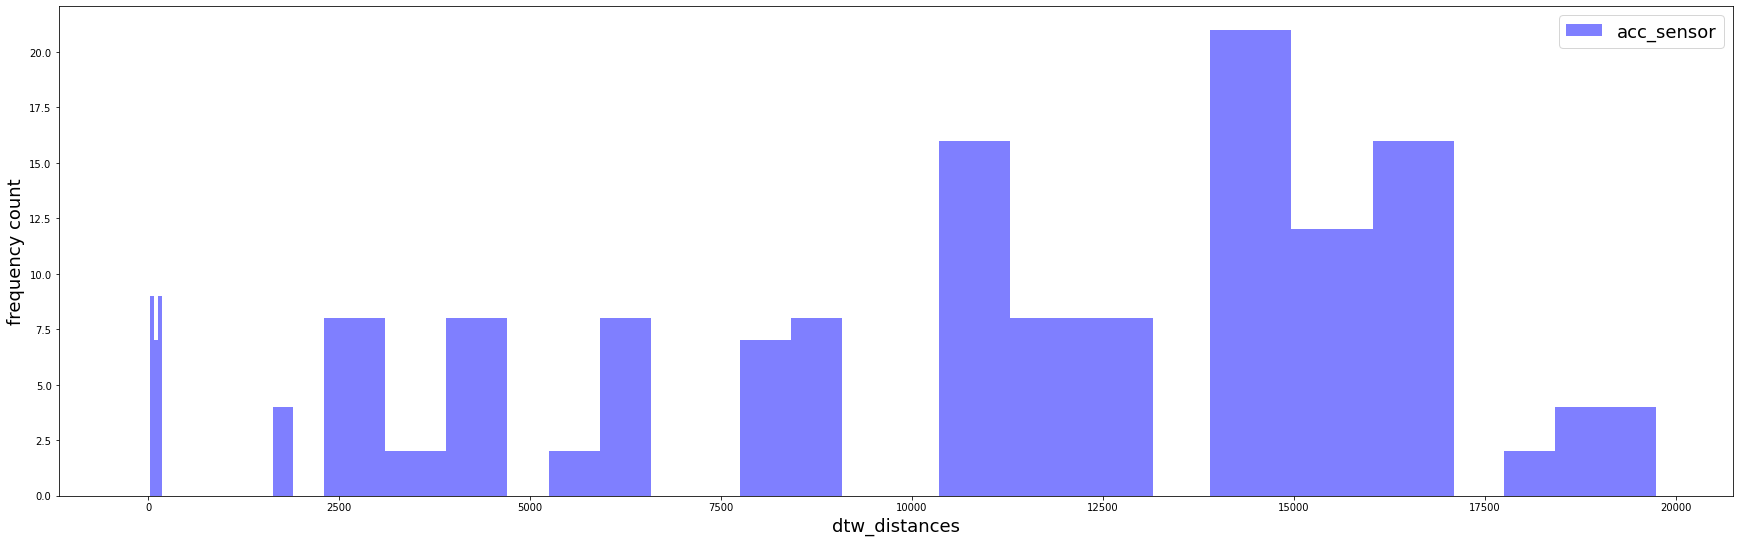

In [148]:
pyplot.hist(results_final_dtw_acc, bins,facecolor = 'b',alpha=0.5, label='acc_sensor')
pyplot.legend(loc='upper right',fontsize=18)
pyplot.xlabel("dtw_distances",fontsize=18)
pyplot.ylabel("frequency count",fontsize=18)


Acc sensor is very well spread out and has the highest dtw distances.

Text(0, 0.5, 'frequency count')

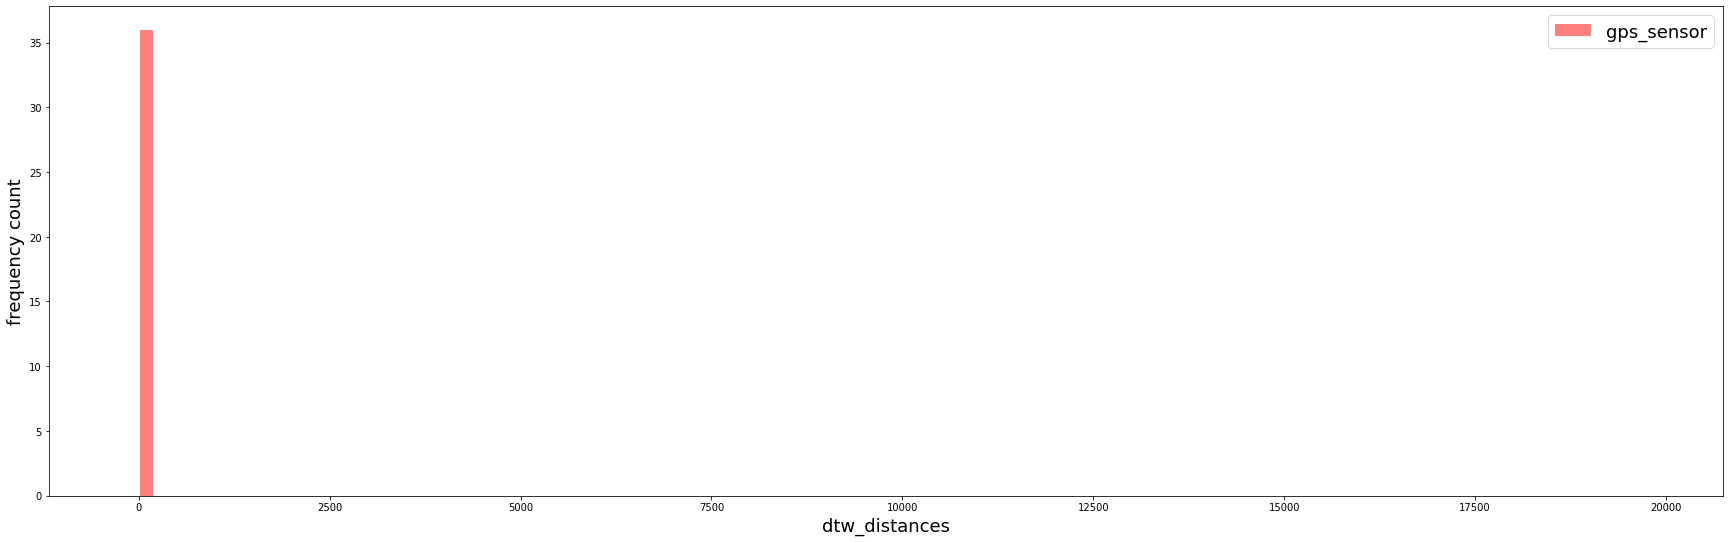

In [149]:
pyplot.hist(results_final_dtw_gps, bins,facecolor = 'r', alpha=0.5, label='gps_sensor')

pyplot.legend(loc='upper right',fontsize=18)
pyplot.xlabel("dtw_distances",fontsize=18)
pyplot.ylabel("frequency count",fontsize=18)


Very less spread out and most of the 1000 variables are nil(0) values. 

Text(0, 0.5, 'frequency count')

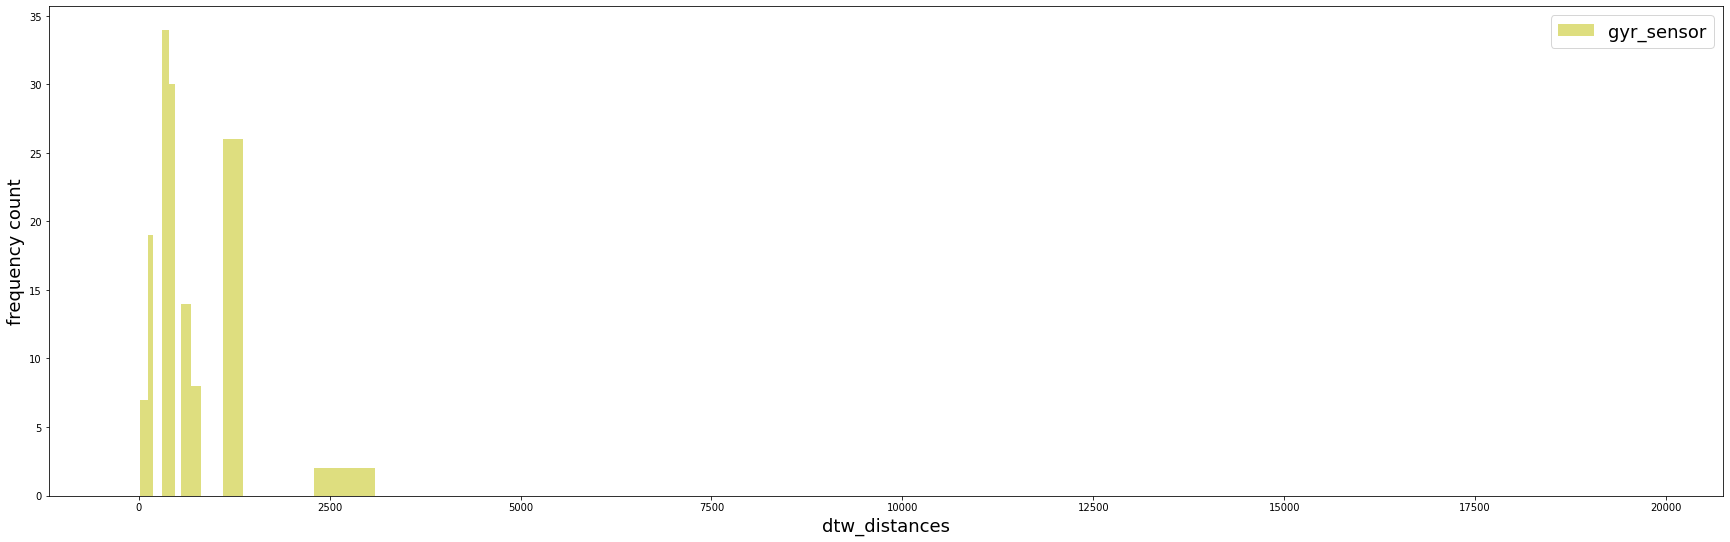

In [150]:
pyplot.hist(results_final_dtw_gyr, bins,facecolor = 'y',alpha=0.5, label='gyr_sensor')

pyplot.legend(loc='upper right',fontsize=18)
pyplot.xlabel("dtw_distances",fontsize=18)
pyplot.ylabel("frequency count",fontsize=18)


Text(0, 0.5, 'frequency count')

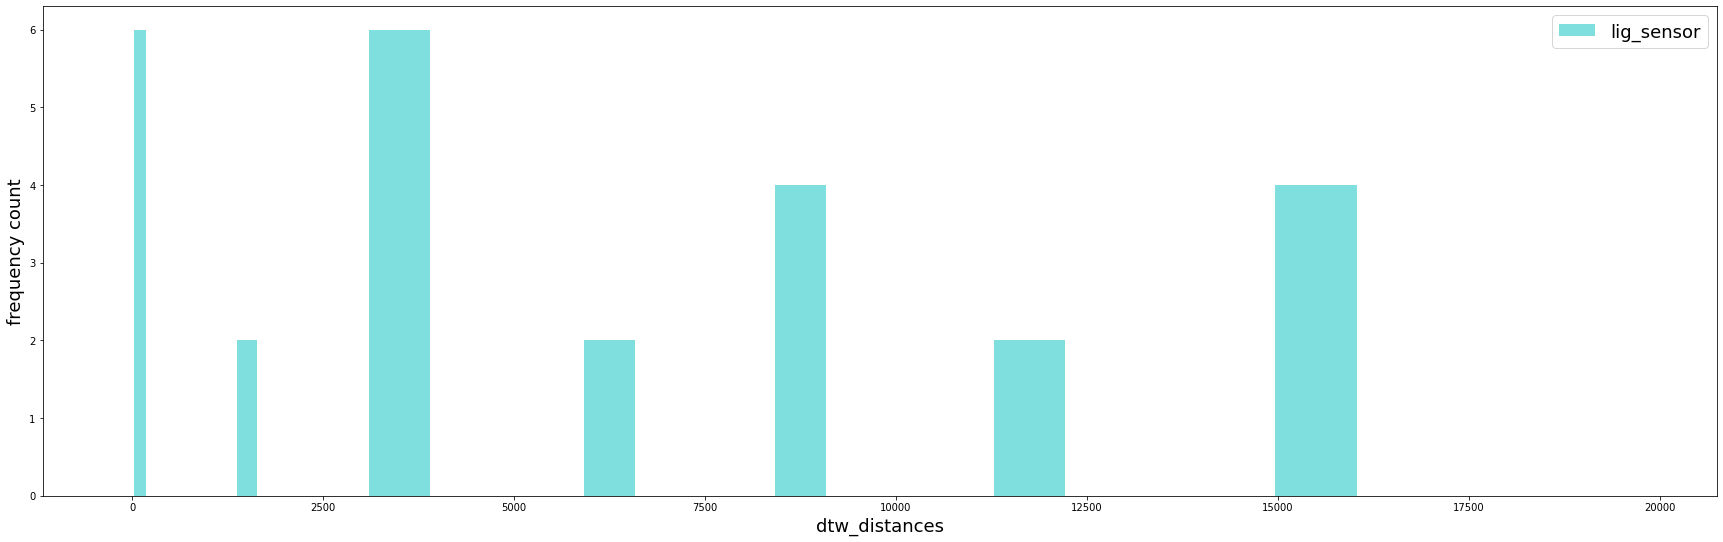

In [151]:
pyplot.hist(results_final_dtw_lig, bins,facecolor = 'c', alpha=0.5, label='lig_sensor')
pyplot.legend(loc='upper right',fontsize=18)
pyplot.xlabel("dtw_distances",fontsize=18)
pyplot.ylabel("frequency count",fontsize=18)


Text(0, 0.5, 'frequency count')

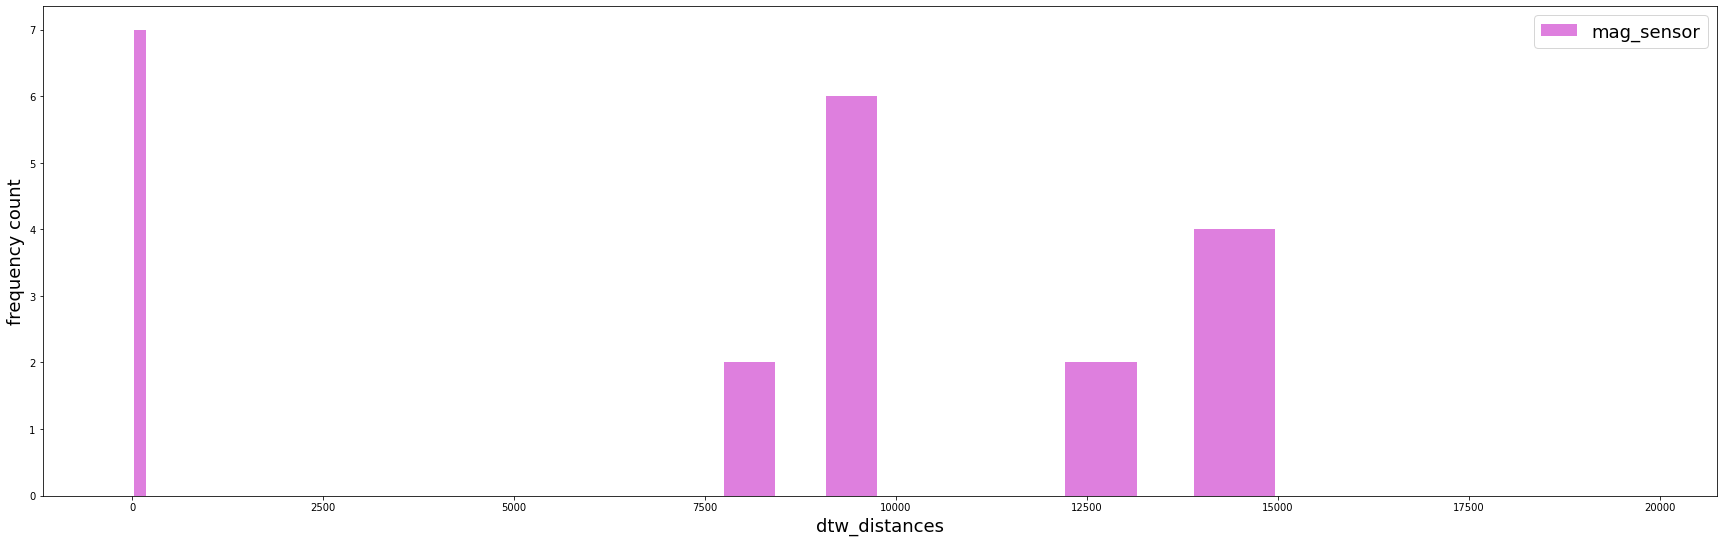

In [152]:
pyplot.hist(results_final_dtw_mag, bins,facecolor = 'm', alpha=0.5, label='mag_sensor')
pyplot.legend(loc='upper right',fontsize=18)
pyplot.xlabel("dtw_distances",fontsize=18)
pyplot.ylabel("frequency count",fontsize=18)

Text(0, 0.5, 'frequency count')

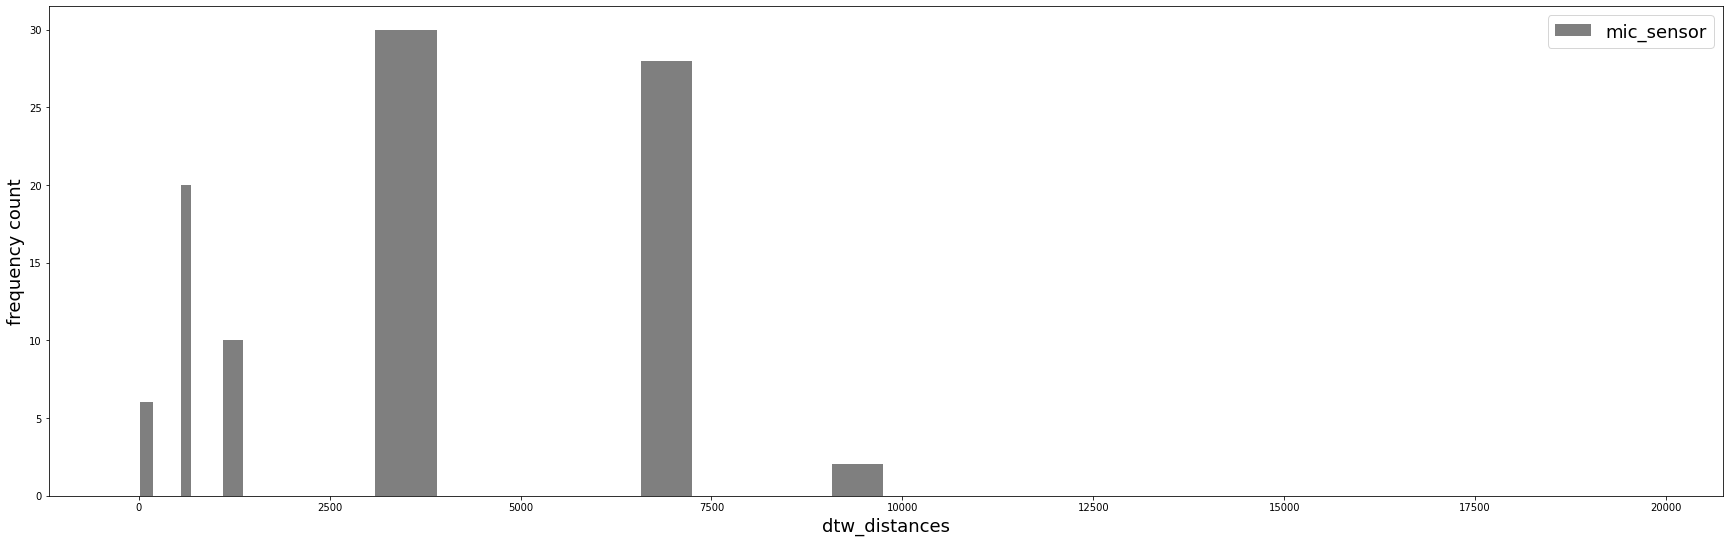

In [153]:
pyplot.hist(results_final_dtw_mic, bins,facecolor = 'k', alpha=0.5, label='mic_sensor')
pyplot.legend(loc='upper right',fontsize=18)
pyplot.xlabel("dtw_distances",fontsize=18)
pyplot.ylabel("frequency count",fontsize=18)

We can clearly see


1.   accelerometer sensor has the highest dtw distances and more spread out
2.   followed by light sensor
3.   followed by magnetic sensor
4.   followed by microphone sensor
5. followed by gyroscope sensor
6. followed by the gps sensor



#FINAL GRAPH

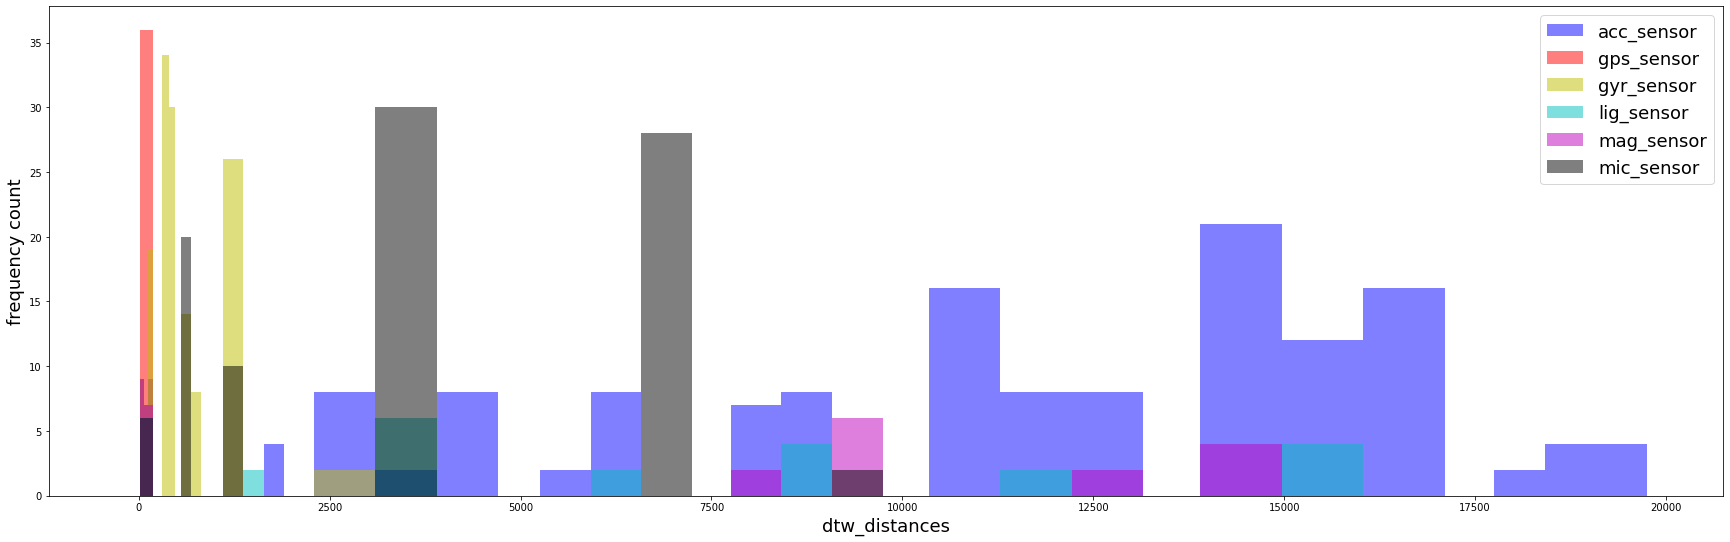

In [155]:
pyplot.hist(results_final_dtw_acc, bins,facecolor = 'b',alpha=0.5, label='acc_sensor')
pyplot.hist(results_final_dtw_gps, bins,facecolor = 'r', alpha=0.5, label='gps_sensor')
pyplot.hist(results_final_dtw_gyr, bins,facecolor = 'y',alpha=0.5, label='gyr_sensor')
pyplot.hist(results_final_dtw_lig, bins,facecolor = 'c', alpha=0.5, label='lig_sensor')
pyplot.hist(results_final_dtw_mag, bins,facecolor = 'm', alpha=0.5, label='mag_sensor')
pyplot.hist(results_final_dtw_mic, bins,facecolor = 'k', alpha=0.5, label='mic_sensor')
pyplot.legend(loc='upper right',fontsize=18)
pyplot.xlabel("dtw_distances",fontsize=18)
pyplot.ylabel("frequency count",fontsize=18)
pyplot.rcParams["figure.figsize"] = [30,9]

#Ranking

**Based on the 3 actvity labels (Jumping, Lying and Standing) here are the rankings**

**Highest to Lowest**

#**ACC > Light > Magnetic > Microphone > Gyroscope > GPS**

